# Loan Data Exploration

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, loan status, borrower APR and rate, current loan status, borrower income and income range and many others.

## Data wrangling

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# Print statistics
print(df.shape)
print(df.describe())

(113937, 81)
       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.18

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [8]:
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [9]:
# Missing values in %
missing_values =  df.isna().sum()
mis_percent = missing_values / len(df) 

In [10]:
# Columns with more than 10 % missing values
above_10_per = mis_percent.loc[lambda x: x > 0.1]

In [11]:
print(above_10_per)

CreditGrade                            0.745886
ClosedDate                             0.516496
EstimatedEffectiveYield                0.255264
EstimatedLoss                          0.255264
EstimatedReturn                        0.255264
ProsperRating (numeric)                0.255264
ProsperRating (Alpha)                  0.255264
ProsperScore                           0.255264
GroupKey                               0.882909
TotalProsperLoans                      0.806165
TotalProsperPaymentsBilled             0.806165
OnTimeProsperPayments                  0.806165
ProsperPaymentsLessThanOneMonthLate    0.806165
ProsperPaymentsOneMonthPlusLate        0.806165
ProsperPrincipalBorrowed               0.806165
ProsperPrincipalOutstanding            0.806165
ScorexChangeAtTimeOfListing            0.833873
LoanFirstDefaultedCycleNumber          0.851216
dtype: float64


**The features with the highest percentage of missing values, approximately 80-88 %:**

- GroupKey - The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.

- TotalProsperLoans - Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

- TotalProsperPaymentsBilled - Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.

- OnTimeProsperPayments - Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.

- ProsperPaymentsLessThanOneMonthLate - Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. 

- ProsperPaymentsOneMonthPlusLate - Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.

- ProsperPrincipalBorrowed - Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

- ProsperPrincipalOutstanding - Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

- ScorexChangeAtTimeOfListing - Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.

- LoanFirstDefaultedCycleNumber -The cycle the loan was charged off. If the loan has not charged off the value will be null. 

**It seems, that most of the borrowers had no prior loans in Prosper. Also, 88% of the borrowers do not have any group affiliation.**


**Approximately 75 % of loans was created before year 2009, and for these the Credit Grade was applied.**

- CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

**Approximately 52 % of loans have assigned Close Date:**
- ClosedDate -  Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 


**Six features contain approximately 25 % missing values:**

- EstimatedEffectiveYield - Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

- EstimatedLoss - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

- EstimatedReturn - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

- ProsperRating (numeric) - The  Prosper Rating assigned at the time the listing was created. Applicable for loans originated after July 2009:

0 - N/A    

1 - HR

2 - E

3 - D

4 - C

5 - B

6 - A

7 - AA


- ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

- ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score.  Applicable for loans originated after July 2009.



In [12]:
# Selected features for the analysis
column_names = ['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatusDuration',
                'IsBorrowerHomeowner','BankcardUtilization','DebtToIncomeRatio','IncomeRange','ProsperScore','ProsperRating (Alpha)','ListingCategory (numeric)',
                'BorrowerState','Occupation','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
                'EstimatedReturn','EstimatedLoss']

In [13]:
def select_columns(data, column_names):
    new_frame = df.loc[:, column_names]
    return new_frame

In [14]:
df_subset = select_columns(df, column_names)

In [15]:
df_subset

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,IsBorrowerHomeowner,BankcardUtilization,DebtToIncomeRatio,...,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,EstimatedReturn,EstimatedLoss
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,2.0,True,0.00,0.17,...,NaN,0,CO,Other,True,3083.333333,9425,330.43,NaN,NaN
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,44.0,False,0.21,0.18,...,A,2,CO,Professional,True,6125.000000,10000,318.93,0.05470,0.0249
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,False,NaN,0.06,...,NaN,0,GA,Other,True,2083.333333,3001,123.32,NaN,NaN
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,113.0,True,0.04,0.15,...,A,16,GA,Skilled Labor,True,2875.000000,10000,321.45,0.06000,0.0249
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,44.0,True,0.81,0.26,...,D,2,MN,Executive,True,9583.333333,15000,563.97,0.09066,0.0925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,36,Current,0.22354,0.1864,246.0,True,0.80,0.13,...,C,1,IL,Food Service Management,True,4333.333333,10000,364.74,0.09500,0.0699
113933,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.13220,0.1110,21.0,True,0.69,0.11,...,A,7,PA,Professional,True,8041.666667,2000,65.57,0.08070,0.0200
113934,1069178,2013-12-13 05:49:12.703000000,60,Current,0.23984,0.2150,84.0,True,0.73,0.51,...,D,1,TX,Other,True,2875.000000,10000,273.35,0.08578,0.1025
113935,539056,2011-11-14 13:18:26.597000000,60,Completed,0.28408,0.2605,94.0,True,0.69,0.48,...,C,2,GA,Food Service,True,3875.000000,15000,449.55,0.15950,0.0850


In [16]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
BankcardUtilization          106333 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
ProsperScore                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
IncomeVerifiable             113937 non-null bool
StatedMo

- ListingNumber - The number that uniquely identifies the listing to the public as displayed on the website.

- ListingCreationDate - The date the listing was created.

- Term - The length of the loan expressed in months.

- LoanStatus - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

- BorrowerAPR - The Borrower's Annual Percentage Rate (APR) for the loan.

- BorrowerRate - The Borrower's interest rate for this loan.

- EmploymentStatusDuration - The length in months of the employment status at the time the listing was created.

- IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

- DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

- IncomeRange - The income range of the borrower at the time the listing was created.

- ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

- ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

- ListingCategory - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

- BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

- Occupation - The Occupation selected by the Borrower at the time they created the listing.

- IncomeRange - The income range of the borrower at the time the listing was created.

- IncomeVerifiable - The borrower indicated they have the required documentation to support their income.

- StatedMonthlyIncome - The monthly income the borrower stated at the time the listing was created.

- LoanOriginalAmount - The origination amount of the loan.

- MonthlyLoanPayment - The scheduled monthly loan payment.

- EstimatedLoss - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

- EstimatedReturn - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

There are only 25 records with missing APR, so we'll remove them.

In [17]:
# Drop rows with missing APR
df_subset['BorrowerAPR'].dropna(inplace=True)

In [18]:
df_subset.BorrowerAPR.isnull().sum()

0

For some unkown reasons, there are missing information about state and occupations of the borrowers. Since we want to keep these records, let's replace these missing values with 'Not avalaible' instead.

In [19]:
df_subset.BorrowerState.isnull().sum()

5515

In [20]:
# Replace nan's with 'Not avalaible' in 'BorrowerState' column
df_subset['BorrowerState'].replace(np.nan, 'Not avalaible', inplace=True)

In [21]:
df_subset.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'Not avalaible',
       'AL', 'AZ', 'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH',
       'NC', 'WA', 'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT',
       'DC', 'MA', 'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID',
       'MT', 'HI', 'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
      dtype=object)

In [22]:
# Replace nan's with 'Not avalaible' in 'Occupation' column
df_subset['Occupation'].replace(np.nan, 'Not available', inplace = True)

Next, we'll rename names of variables and change incorrect data type of columns.

In [23]:
df_subset.columns

Index(['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'BankcardUtilization', 'DebtToIncomeRatio',
       'IncomeRange', 'ProsperScore', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'EstimatedReturn', 'EstimatedLoss'],
      dtype='object')

In [24]:
# Change the names of variables for better readability
df_subset.rename(columns= {'ListingNumber':'listing_number','ListingCreationDate':'listing_date', 'Term':'term',
                           'LoanStatus':'loan_status', 'BorrowerAPR':'APR','BorrowerRate':'interest_rate',
                           'EmploymentStatusDuration':'employment_duration','IsBorrowerHomeowner':'is_borrower_homeowner',
                           'BankcardUtilization':'bank_card_utilization',
                           'DebtToIncomeRatio':'debt_to_income_ratio','IncomeRange':'income_range',
                           'ProsperScore':'prosper_score','ProsperRating (Alpha)':'prosper_rating',
                           'ListingCategory (numeric)':'loan_category','BorrowerState':'state',
                           'Occupation':'occupation','IncomeVerifiable':'income_verifiable', 'StatedMonthlyIncome':'monthly_income',
                           'LoanOriginalAmount':'loan_orig_amount','MonthlyLoanPayment':'monthly_payment',
                           'EstimatedLoss':'estimated_loss','EstimatedReturn':'estimated_return'}, inplace=True)

In [25]:
df_subset.columns

Index(['listing_number', 'listing_date', 'term', 'loan_status', 'APR',
       'interest_rate', 'employment_duration', 'is_borrower_homeowner',
       'bank_card_utilization', 'debt_to_income_ratio', 'income_range',
       'prosper_score', 'prosper_rating', 'loan_category', 'state',
       'occupation', 'income_verifiable', 'monthly_income', 'loan_orig_amount',
       'monthly_payment', 'estimated_return', 'estimated_loss'],
      dtype='object')

In [26]:
df_subset.dtypes

listing_number             int64
listing_date              object
term                       int64
loan_status               object
APR                      float64
interest_rate            float64
employment_duration      float64
is_borrower_homeowner       bool
bank_card_utilization    float64
debt_to_income_ratio     float64
income_range              object
prosper_score            float64
prosper_rating            object
loan_category              int64
state                     object
occupation                object
income_verifiable           bool
monthly_income           float64
loan_orig_amount           int64
monthly_payment          float64
estimated_return         float64
estimated_loss           float64
dtype: object

In [27]:
df_subset.listing_date = pd.to_datetime(df_subset.listing_date)
df_subset['listing_date'] = df_subset['listing_date'].dt.date

In [28]:
# Convert incorrect data types
df_subset.listing_number = df_subset.listing_number.astype('object')
df_subset.loan_status = df_subset.loan_status.astype('category')
df_subset.loan_category = df_subset.loan_category.astype('category')
df_subset.occupation = df_subset.occupation.astype('category')
df_subset.monthly_income = df_subset.monthly_income.astype('int')
df_subset.monthly_payment = df_subset.monthly_payment.astype('int')

In [29]:
df_subset['term'] = df_subset.term.astype('category')

In [30]:
df_subset['listing_date'] = pd.to_datetime(df_subset.listing_date)

In [31]:
df_subset['year'] = df_subset['listing_date'].dt.year

In [32]:
df_subset.loan_category

0          0
1          2
2          0
3         16
4          2
          ..
113932     1
113933     7
113934     1
113935     2
113936     1
Name: loan_category, Length: 113937, dtype: category
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

The last thing we need to do is replace the numeric values of the loan category that the borrowers selected when posting their loans. 

As follows:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [33]:
df_subset.loan_category = df_subset.loan_category.astype('str')

In [34]:
new_category = {'0':'Not Avalaible',
               '1':'Debt Consolidation',
               '2':'Home Improvement',
               '3':'Business',
               '4':'Personal Loan',
               '5':'Student Use',
               '6':'Auto',
               '7':'Other',
               '8':'Baby & Adoption',
               '9':'Boat',
               '10':'Cosmetic Procedure',
               '11':'Engagement Ring',
               '12':'Green Loans',
               '13':'Household Expenses',
               '14':'Large Purchases',
               '15':'Medical/Dental',
               '16':'Motorcycle',
               '17':'RV',
               '18':'Taxes',
               '19':'Vacation',
               '20':'Wedding Loans'}

In [35]:
df_subset['loan_category'] = df_subset['loan_category'].map(new_category)

In [36]:
df_subset.loan_category.value_counts()

Debt Consolidation    58308
Not Avalaible         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: loan_category, dtype: int64

In [161]:
df_subset.shape

(83948, 23)

### What is the structure of our dataset?
There are 113937 records and 81 variables in the original dataset. For the analysis we created the subset with the features we are the most interested in,namely:'listing_number', 'listing_date', 'term', 'loan_status', 'APR',
       'interest_rate', 'employment_duration', 'is_borrower_homeowner','bank_card_utilization',
       'debt_to_income_ratio', 'income_range', 'prosper_score',
       'prosper_rating', 'loan_category', 'state', 'occupation',
       'income_verifiable', 'monthly_income', 'loan_orig_amount',
       'monthly_payment', 'estimated_return', 'estimated_loss'. 

Most variables are numeric, but there are also some categorical variables, and some of them will be changed to ordered categorical variables.

**Prosper score** 
- ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1. 

**Prosper rating** has categories: AA, A, B, C, D, E, HR, with AA being the best rating for the loan.

The groups of **Income range** (in $):  

- '1-24,999' 
- '25,000-49999' 
- '50,000-74,999' 
- '75,000-99,999'
- '100,000+'

**Term** has three groups: **12, 36 and 60** months term loan.

### What is the main feature of interest in our dataset?

I'm most interested in figuring out what features affect [borrower's Interest rate](https://en.wikipedia.org/wiki/Interest_rate).

[Interest rates and APR (Annual percentage rate)](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp) are two frequently conflated terms, but they're not the same. **The interest rate** is the cost of borrowing the principal. **The APR** is almost always higher than the interest rate, because it includes any additional costs or fees.

### What features in the dataset will help support our investigation into our feature of interest?
I expect that The debt-to-income ratio, the Prosper score, the Prosper rating, stated monthly income, the loan original amount and term could have an impact on the interest rate.

### Univariate Exploration  

We'll start by looking at the distribution of the main variable of interest: The interest rate of the borrower

In [38]:
# Set the parameters
params = {'figure.figsize':(9,7),
         'axes.labelsize':13,
         'axes.titlesize':16,
         'xtick.labelsize':11,
         'ytick.labelsize':11
         }
plt.rcParams.update(params)
sns.set_style('darkgrid')

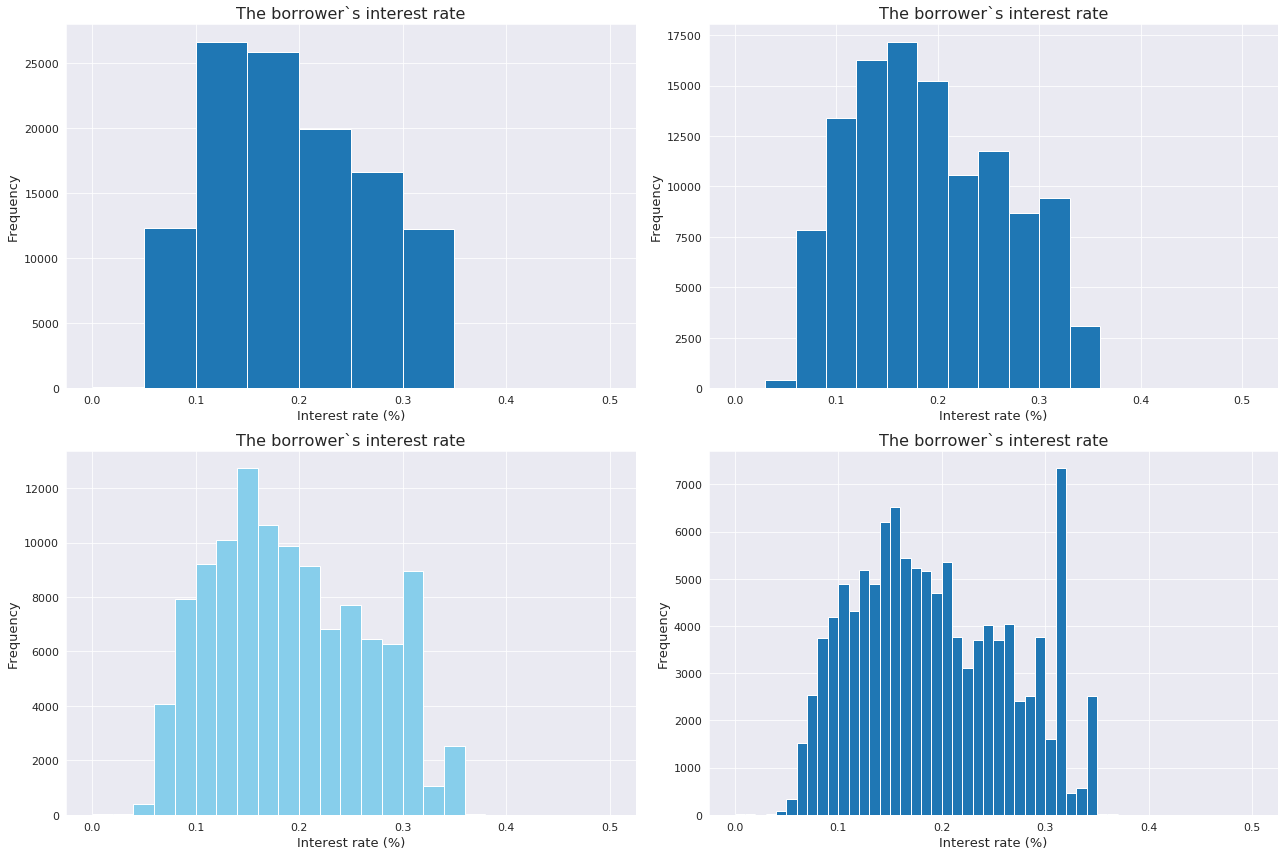

In [39]:
# Plot histograms with different bin width using subplots
# Create grid of 2x2 subplots
fig, axes = plt.subplots(2,2, figsize = (18,12))
axes = axes.flatten()
for i in range(4):
    # Create the current axis
    plt.sca(axes[i])
    
# Set different bin widths and axis labels
bins_0 = np.arange(0, df_subset.interest_rate.max() + 0.05, 0.05)
axes[0].hist(data = df_subset, x = 'interest_rate', bins = bins_0)

bins_1 = np.arange(0, df_subset.interest_rate.max() + 0.03, 0.03)
axes[1].hist(data = df_subset, x = 'interest_rate', bins = bins_1)

bins_2 = np.arange(0, df_subset.interest_rate.max() + 0.02, 0.02)
axes[2].hist(data = df_subset, x = 'interest_rate', bins = bins_2, color = 'skyblue')

bins_3 = np.arange(0, df_subset.interest_rate.max() + 0.01, 0.01)
axes[3].hist(data = df_subset, x = 'interest_rate', bins = bins_3)
# Add axis labels and title
for ax in axes:
    ax.set_xlabel('Interest rate (%)')
    ax.set_ylabel('Frequency')
    ax.set_title('The borrower`s interest rate')
# Adjust the positions of the axes on the figure canvas so that there is no overlapping content
fig.tight_layout();

In the graphs above, we visualized The borrower's interest rate distribution using histograms. Because the visual appearance of the histogram depends on the bin width, we tried different bin widths to verify that the resulting graph accurately reflects the underlying data. In general, if the bin widths are too large, we might not see the smaller features of the data distribution. If the bin widths are too small, the histogram becomes visually busy (as we can see in the down to the right graph), and the main trend in the data may be obscured.

In [40]:
def make_histogram(x, bins,ax=None,**kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    plt.hist(x,bins,**kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

In [41]:
df_subset.interest_rate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: interest_rate, dtype: float64

In [42]:
bins_2 = np.arange(0, df_subset.interest_rate.max() + 0.02, 0.02)

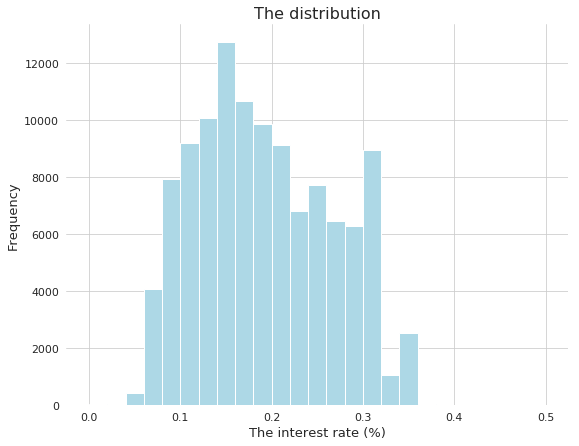

In [43]:
sns.set_style("whitegrid")
labels = {'title':'The distribution','xlabel':'The interest rate (%)','ylabel':'Frequency'}
make_histogram(df_subset.interest_rate, bins_2, color = 'lightblue', **labels)
sns.despine(left=True, bottom=True);



The distribution of the interest rate is unimodal, and there are two peaks. From the area slightly below **10%**, there is an increase of the frequency. There is a peak exactly between **10% and 20%** following by the decreasing of the frequency. Interestingly, there is a steep jump of the frequency **at 30%** rather than a smooth decrease of frequencies. 

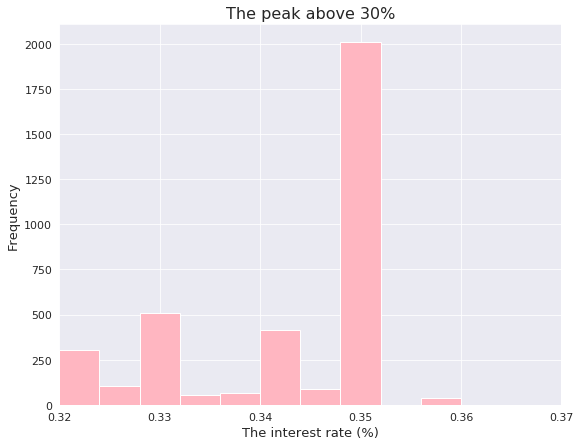

In [44]:
# Plot the area with a peak above 0.3
sns.set_style('darkgrid')
bins_peak = np.arange(0.32, 0.37 + 0.004,0.004)
labels = {'title':'The peak above 30%','xlabel':'The interest rate (%)','ylabel':'Frequency'}
make_histogram(df_subset.interest_rate, bins_peak, color = 'lightpink', **labels)
plt.xlim(0.32,0.37);

We can see, that the peak is actually right between **0.3 and 0.4**.

In [45]:
df_subset.interest_rate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: interest_rate, dtype: float64

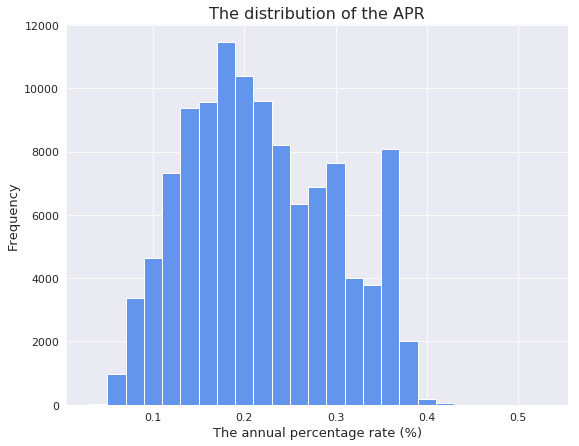

In [46]:
# Display the distribution of the APR
bins_apr = np.arange(0.03, df_subset.APR.max() + 0.02, 0.02)
labels = {'title':'The distribution of the APR','xlabel':'The annual percentage rate (%)','ylabel':'Frequency'}
make_histogram(df_subset.APR, bins_apr, color = 'cornflowerblue', **labels);

The distribution of the APR is unimodal, the frequency is increasing to value 0.2, then it's decreasing. This decreasing is not smooth and there is one distinct peak before value **0.4**

Next, we'll look at the distribution of original loan amounts.

In [47]:
df_subset.loan_orig_amount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: loan_orig_amount, dtype: float64

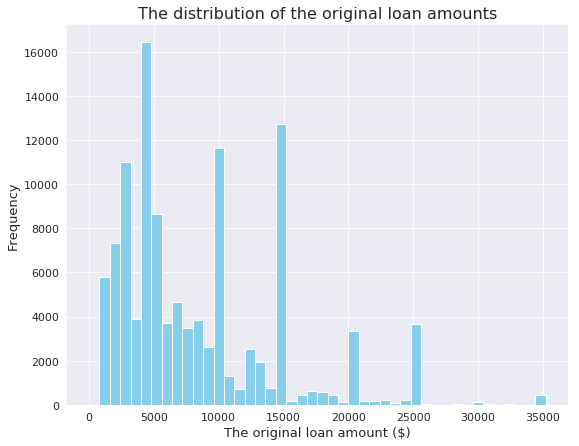

In [48]:
# Display The original loan amount distribution
bin_edges = np.arange(0, df_subset.loan_orig_amount.max() + 800, 800)
labels = {'title':'The distribution of the original loan amounts','xlabel':'The original loan amount ($)','ylabel':'Frequency'}
make_histogram(df_subset.loan_orig_amount, bin_edges, color = 'skyblue', **labels);

As we can see from the graph, the distribution of the original loan amounts has a very long tail (lots of points with low values, with a very long tail of data points with large values). Therefore it is better to display this distribution on the logarithmic scale, rather than on the linear scale. We'll need to modify bin boundaries and create informative ticks for the x-axis. 

In [49]:
# Display the base 10 logarithm of x in order to create bins
np.log10(df_subset.loan_orig_amount.describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: loan_orig_amount, dtype: float64

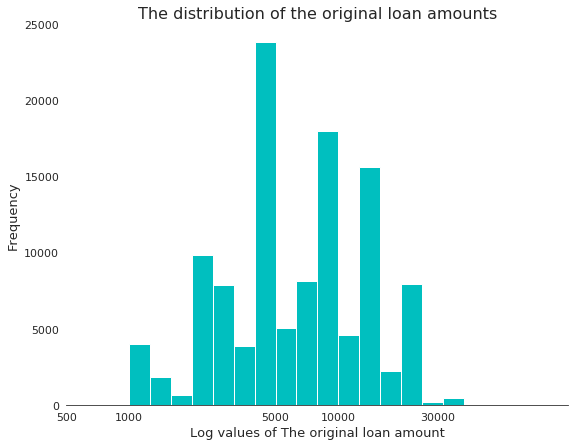

In [50]:
# Plot the distribution after the logarithmic transformation on x-axis
# Set bin edges in increments of 0.1 powers of ten 
sns.set_style('white')
bins = 10 ** np.arange(3, 5 + 0.1, 0.1)
labels = {'title':'The distribution of the original loan amounts','xlabel':'Log values of The original loan amount','ylabel':'Frequency'}
make_histogram(df_subset.loan_orig_amount, bins, color = 'c', **labels);
plt.xscale('log')
# Customize tick marks
tick_locs = [500,1000,5000,10000,30000]
tick_labels = ['{}'.format(v) for v in tick_locs]
plt.xticks(tick_locs, tick_labels)
sns.despine(left=True, bottom=False, right=True);

After aplying the logarithmic transformation, the data follow normal distribution that looks unimodal with the peak close to value **5000**. There are interesting changes in the frequency after 5000. The frequency does not fall down gradually, but there are three peaks and each peak is followed by decrease of frequency.

Now, we'll look at the monthly income ditribution.

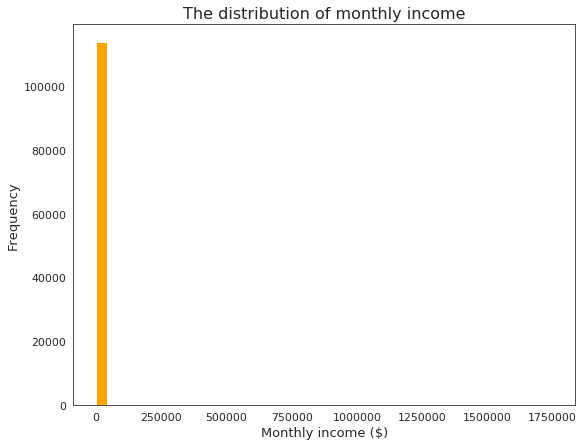

In [51]:
# Plot the distribution of monthly income
labels = {'title':'The distribution of monthly income','xlabel':'Monthly income ($)','ylabel':'Frequency'}
make_histogram(df_subset.monthly_income, bins = 40, color = 'orange', **labels);

This distribution of the data indicate that there might be outliers in our dataset.

In [52]:
print(df_subset.monthly_income.describe())

count    1.139370e+05
mean     5.607707e+03
std      7.478491e+03
min      0.000000e+00
25%      3.200000e+03
50%      4.666000e+03
75%      6.825000e+03
max      1.750002e+06
Name: monthly_income, dtype: float64


In [53]:
df_subset.monthly_income.max()

1750002

In [54]:
df_subset[df_subset['monthly_income'] <= 1750002].sort_values('monthly_income',ascending = False)

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year
53167,560783,2012-02-20,36,Current,0.35797,0.3177,114.0,True,0.61,NaN,...,Business,OR,Professional,False,1750002,4000,173,0.1246,0.1650,2012
53014,694401,2013-01-04,12,Completed,0.25785,0.1795,117.0,True,0.62,NaN,...,Business,CA,Other,False,618547,4000,366,0.0584,0.0975,2013
17411,501462,2011-04-08,36,Completed,0.35643,0.3199,121.0,True,0.86,0.0,...,Debt Consolidation,HI,Professional,True,483333,7500,326,0.1487,0.1470,2011
57133,499194,2011-03-24,36,Current,0.35643,0.3199,271.0,True,0.00,0.0,...,Home Improvement,CT,Other,True,466666,4000,174,0.1487,0.1470,2011
8066,500651,2011-04-02,36,Completed,0.35643,0.3199,183.0,True,0.00,0.0,...,Debt Consolidation,IL,Police Officer/Correction Officer,True,416666,2000,87,0.1087,0.1830,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63410,528529,2011-09-20,36,Current,0.30532,0.2699,5.0,False,0.52,NaN,...,Other,GA,Other,False,0,4500,183,0.1414,0.1120,2011
7388,652238,2012-10-10,36,Current,0.35797,0.3177,1.0,False,0.49,NaN,...,Debt Consolidation,CA,Other,False,0,2500,108,0.1174,0.1625,2012
44523,574109,2012-03-31,36,Chargedoff,0.35797,0.3177,126.0,False,0.54,NaN,...,Medical/Dental,MD,Other,False,0,4000,173,0.1246,0.1650,2012
51391,103797,2007-02-26,36,Completed,0.10351,0.0966,64.0,False,0.11,NaN,...,Not Avalaible,LA,Homemaker,False,0,4950,158,NaN,NaN,2007


The maximum value of monthly income is 1750002$, probably an erroneous value and there are more such values in our dataset. We'll keep only those monthly incomes which are in 99th percentile.

In [55]:
income_percentile = np.percentile(df_subset.monthly_income, 99)

In [56]:
income_percentile

20526.239999999976

In [57]:
df_subset[df_subset['monthly_income'] > 20526]

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year
196,656502,2012-10-18,60,Current,0.15752,0.1346,89.0,True,0.11,0.04000,...,Vacation,NY,Other,True,33333,25000,574,0.09060,0.0299,2012
224,1130508,2014-01-10,36,Current,0.13799,0.1099,114.0,True,0.34,0.11000,...,Debt Consolidation,WI,Sales - Commission,True,33333,30000,982,0.06388,0.0324,2014
291,1209399,2014-02-15,60,Current,0.15868,0.1355,25.0,True,0.72,NaN,...,Debt Consolidation,NY,Sales - Commission,False,25000,15000,345,0.07192,0.0474,2014
307,1064774,2013-12-10,36,Current,0.15223,0.1239,26.0,True,0.15,NaN,...,Debt Consolidation,NJ,Professional,False,40000,15000,501,0.06910,0.0399,2013
334,717871,2013-02-22,36,Current,0.21025,0.1734,27.0,True,0.76,0.19000,...,Home Improvement,CT,Executive,True,27500,12000,429,0.09120,0.0624,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113422,863075,2013-08-07,36,Current,0.22712,0.1899,60.0,True,0.93,0.07000,...,Home Improvement,NJ,Executive,True,45833,15000,549,0.09550,0.0724,2013
113471,519104,2011-07-29,36,Current,0.20200,0.1799,140.0,False,0.98,0.09000,...,Home Improvement,CA,Engineer - Electrical,True,25000,11304,408,0.10740,0.0595,2011
113475,745740,2013-04-06,36,Current,0.24246,0.2049,38.0,True,0.80,0.17000,...,Debt Consolidation,FL,Principal,True,20833,3500,130,0.09840,0.0824,2013
113776,586583,2012-05-06,12,Completed,0.09986,0.0628,69.0,False,0.54,0.10000,...,Debt Consolidation,NY,Computer Programmer,True,23750,3000,258,0.03280,0.0200,2012


In [58]:
# Get names of indexes where monthly income is larger than 20526
index_list_number = df_subset[df_subset['monthly_income'] > 20526].index

In [59]:
df_subset.drop(index_list_number, inplace = True)

In [60]:
df_subset[df_subset['monthly_income'] > 20526]

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year


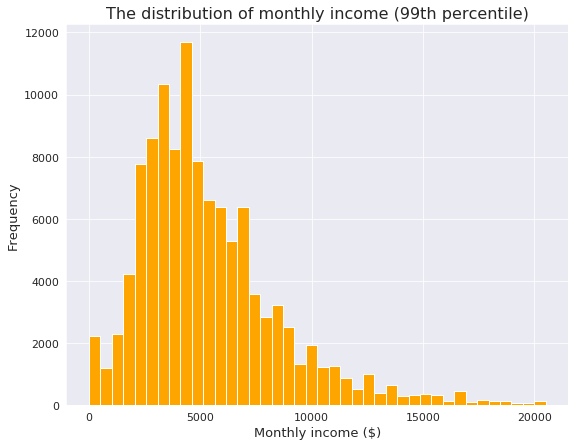

In [61]:
# Plot the monthly income distribution (data within 99th percentile)
sns.set_style('darkgrid')
labels = {'title':'The distribution of monthly income (99th percentile)','xlabel':'Monthly income ($)','ylabel':'Frequency'}
make_histogram(df_subset.monthly_income, bins = 40, color = 'orange', **labels);

After dropping 1% of the data with large values, the distribution of monthly income looks much better. As we can see the distribution is unimodal and right skewed with one peak a little below **5000$**.

Next, we'll look at the monthly payments of the loans.

In [62]:
df_subset.monthly_payment.describe()

count    112797.000000
mean        269.714124
std         190.147065
min           0.000000
25%         130.000000
50%         216.000000
75%         368.000000
max        2251.000000
Name: monthly_payment, dtype: float64

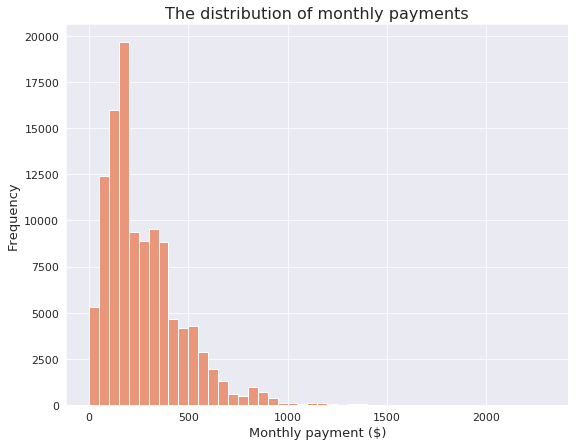

In [63]:
# Plot the distribution of the monthly payments
bins_payment = np.arange(0, df_subset.monthly_payment.max() + 50, 50)
labels = {'title':'The distribution of monthly payments','xlabel':'Monthly payment ($)','ylabel':'Frequency'}
make_histogram(df_subset.monthly_payment, bins_payment, color = 'darksalmon', **labels);

The distribution of the monthly payments is unimodal and very skewed to the right. Most borrowers have to pay **under 500$** per month.

Next, we'll look at the variable term that contain information about the length of the loan expressed in months.

In [64]:
def make_countplot(x,ax=None,**kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    sns.countplot(x.sort_values(ascending = False),**kwargs)
    plt.xticks(rotation = 90)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

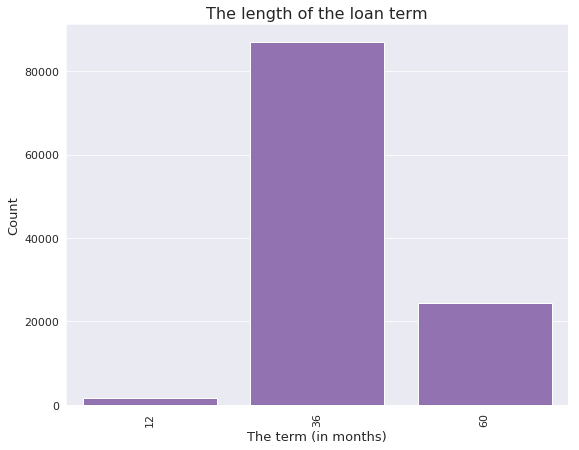

In [65]:
base_color = sns.color_palette()[4]
labels = {'title':'The length of the loan term','xlabel':'The term (in months)','ylabel':'Count'}
make_countplot(df_subset.term, color = base_color, **labels);

The most borrowers have the loans with term of **36 months** and the least clients have the loans for 12 months. 

Now, we'd like to look at the occupations of our borrowers. There are 68 unique occupations in our dataset.

In [66]:
print(df_subset.occupation.value_counts())
print(df_subset.occupation.nunique())

Other                          28478
Professional                   13474
Computer Programmer             4460
Executive                       3978
Teacher                         3759
                               ...  
Dentist                           63
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: occupation, Length: 68, dtype: int64
68


In [67]:
occup_order = df_subset['occupation'].value_counts().index

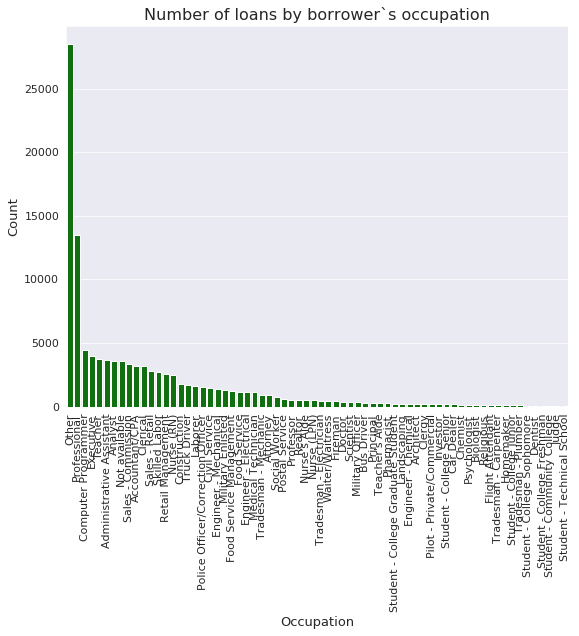

In [68]:
labels = {'title':'Number of loans by borrower`s occupation','xlabel':'Occupation','ylabel':'Count'}
make_countplot(df_subset.occupation, color = 'green',order = occup_order, **labels);

The highest number of loans is in the category **Other**. Second most common occupation category is **Professional**. These two categories don't provide enough information for us, since we don't know what occupation exactly belong into these two groups. Therefore, we filter out records within these categories and those that are in group **Not available**.
**The students are at the very end together with Dentists and Judges**.

In [69]:
occups = df_subset.query(("occupation != 'Other' & occupation != 'Professional' & occupation != 'Not available'"))

In [70]:
order = occups['occupation'].value_counts(ascending=False).index

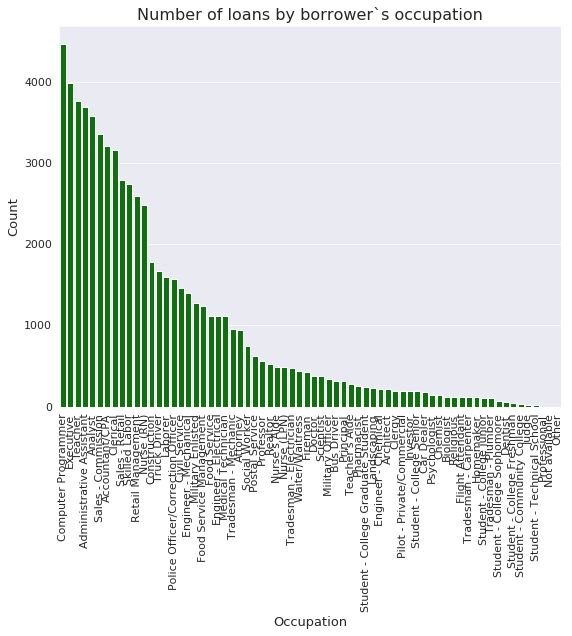

In [71]:
labels = {'title':'Number of loans by borrower`s occupation','xlabel':'Occupation','ylabel':'Count'}
make_countplot(occups.occupation, color = 'green',order = order, **labels);

Now we can see that the most common occupations are **Computer Programmers, Executives, Teachers, Analysts and Administrative Assistants**.

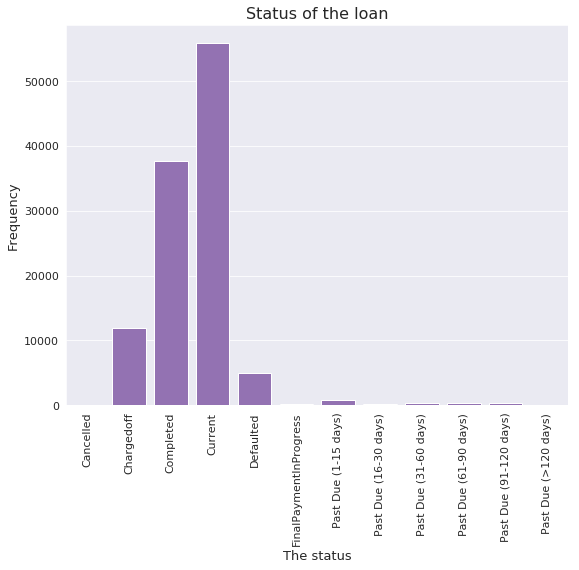

In [72]:
labels = {'title':'Status of the loan','xlabel':'The status','ylabel':'Frequency'}
make_countplot(df_subset.loan_status, color = base_color, **labels);

The highest count have the loans with **Current** status, following by loans that have status **Completed**. There are only 5 loans cancelled. 

We'll take a closer look [at the loans that are late on a payment](https://prosper.zendesk.com/hc/en-us/articles/210013613-What-happens-if-a-borrower-is-late-on-a-payment-). 

In [73]:
df_subset.loan_status.value_counts()

Current                   55902
Completed                 37718
Chargedoff                11914
Defaulted                  5001
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       310
Past Due (91-120 days)      303
Past Due (16-30 days)       263
FinalPaymentInProgress      204
Past Due (>120 days)         16
Cancelled                     5
Name: loan_status, dtype: int64

In [74]:
past_due = df_subset.loc[df_subset['loan_status'].isin(['Past Due (1-15 days)','Past Due (16-30 days)',
                                                        'Past Due (31-60 days)','Past Due (61-90 days)',
                                                        'Past Due (91-120 days)', 'Past Due (>120 days)'])]

In [75]:
due_ord = ['Past Due (1-15 days)','Past Due (16-30 days)',
          'Past Due (31-60 days)','Past Due (61-90 days)',
          'Past Due (91-120 days)', 'Past Due (>120 days)']

In [76]:
due_order = pd.api.types.CategoricalDtype(ordered = True, categories = due_ord)

In [77]:
past_due.loan_status = past_due.loan_status.astype(due_order)

In [78]:
past_due.sort_values('loan_status', ascending = False, inplace = True)

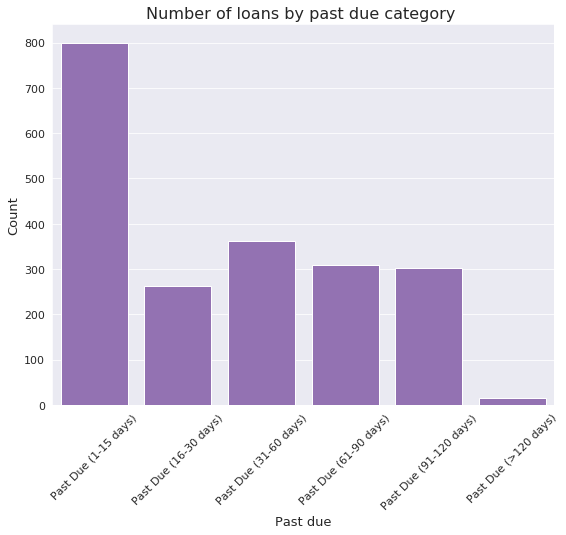

In [79]:
labels = {'title':'Number of loans by past due category ','xlabel':'Past due','ylabel':'Count'}
make_countplot(past_due.loan_status, color = base_color, **labels)
plt.xticks(rotation = 45);

The highest count has the first category [**Past Due (1-15 days)**](https://prosper.zendesk.com/hc/en-us/articles/210013613-What-happens-if-a-borrower-is-late-on-a-payment-). If the borrower is more than 15 days late on a borrower loan, the borrower will be charged a late fee. The lowest frequency has the last category **Past Due (>120 days)**: Borrower's loan that become more than 120 days overdue will be charged-off and the borrower will never be able to borrow again from Prosper.

In [80]:
df_subset.loan_category

0              Not Avalaible
1           Home Improvement
2              Not Avalaible
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: loan_category, Length: 112797, dtype: object

In [81]:
df_subset.loan_category.value_counts()

Debt Consolidation    57749
Not Avalaible         16823
Other                 10409
Home Improvement       7291
Business               7097
Auto                   2567
Personal Loan          2379
Household Expenses     1979
Medical/Dental         1510
Large Purchases         865
Taxes                   854
Vacation                763
Wedding Loans           760
Student Use             753
Motorcycle              303
Engagement Ring         213
Baby & Adoption         197
Cosmetic Procedure       91
Boat                     84
Green Loans              58
RV                       52
Name: loan_category, dtype: int64

In [82]:
category_order = df_subset.loan_category.value_counts().sort_values(ascending=False).index

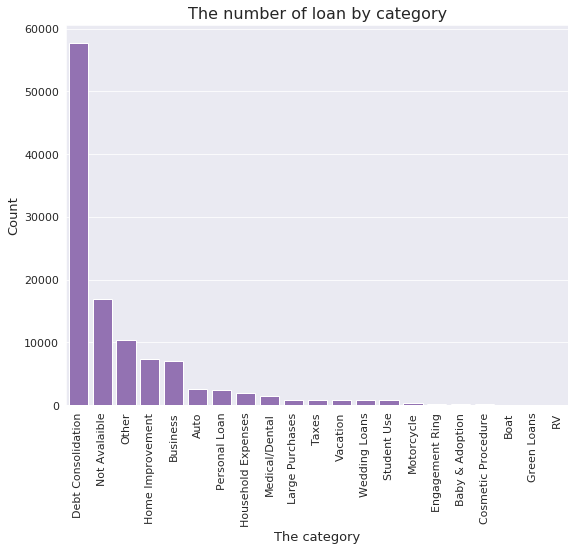

In [83]:
labels = {'title':'The number of loan by category','xlabel':'The category','ylabel':'Count'}
make_countplot(df_subset.loan_category, order = category_order,color = base_color, **labels);

The most loans are in the category **Debt consolidation**: A debt consolidation loan can help the borrower pay off his/her existing loans faster by reducing the number of interest charges they accrue each month. The similar numbers of loans are in categories **Home improvement and Business**. 

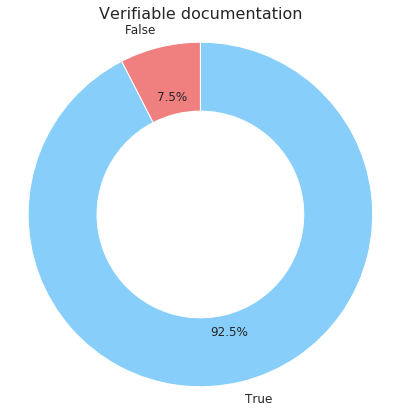

In [84]:
# Plot the proportion of verifiable documentation
colors = ['lightskyblue', 'lightcoral']
ax = df_subset['income_verifiable'].value_counts(normalize=True).mul(100).plot(kind = 'pie', autopct='%1.1f%%',startangle = 90, 
                                                                          counterclock = False, textprops={'fontsize': 12},
                                                                          pctdistance=0.7, wedgeprops = {'width':0.4},
                                                                          colors = colors) 

plt.title('Verifiable documentation')
plt.ylabel('')
plt.axis('square');

There are approximately **92.5%** borrowers who have the required documentation to support their income.

A custom risk score was built using historical Prosper data to assess the risk of Prosper borrower listings. The output to Prosper users is a [Prosper Score](https://www.prosper.com/help/topics/general-prosper_score.aspx) which ranges from **1 to 11**, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1.

In [85]:
df_subset.dropna(subset=['prosper_score'],inplace=True)

In [86]:
df_subset.prosper_score = df_subset.prosper_score.astype('int')

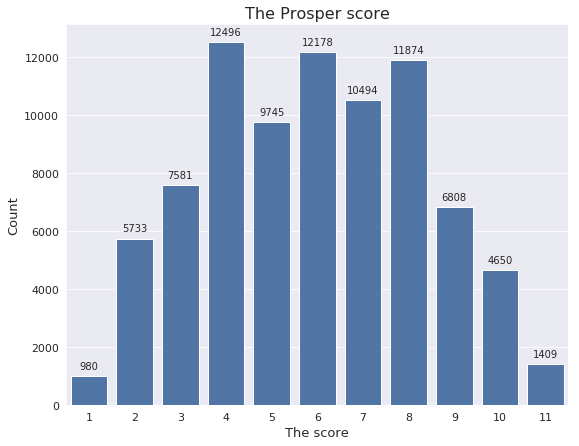

In [87]:
# Plot the proportion of prosper score
b_color = sns.color_palette
plot = sns.countplot(df_subset.prosper_score, color = "#4374B3")
plt.title('The Prosper score')
plt.xlabel('The score')
plt.ylabel('Count')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

The average Prosper score is **6** and the most borrowers have assigned the score **in the range 4-8**. The most common score is **4 with 12595 loans**, followed with score **6 with 12278 loans**. There are only 980 'risky' borrowers.

In [88]:
prosper_rating_order = ['AA','A','B','C','D','E','HR']

In [89]:
rating_order = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating_order)

In [90]:
df_subset['prosper_rating'] = df_subset['prosper_rating'].astype(rating_order)

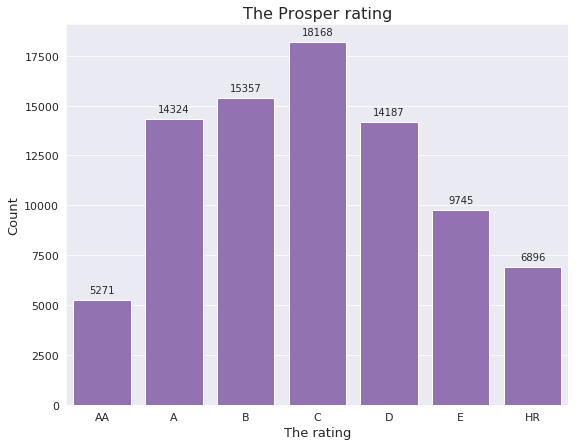

In [91]:
plot_2 = sns.countplot(df_subset.prosper_rating, color = base_color)
plt.title('The Prosper rating')
plt.xlabel('The rating')
plt.ylabel('Count')
for p in plot_2.patches:
    plot_2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

Every loan application is assigned a [Prosper Rating](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline). Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor. It is applicable for loans originated after July 2009.

Rating and  Estimated Avg. Annual Loss Rate

- AA : 0.00-1.99%

- A : 2.00–3.99%

- B : 4.00–5.99%

- C : 6.00–8.99%

- D : 9.00–11.99%

- E : 12.00–14.99%

- HR : ≥ 15.00%

The estimated base loss rate is determined by two scores: 
- the borrower's credit score, obtained from an official credit reporting agency

- the Prosper Score

The most loans have assigned **the rating C (5649 lonas) with estimated average annual loss rate 6-8.99%, followed by the rating D (5153 loans)**.

In [92]:
df_subset.debt_to_income_ratio.describe()

count    76793.000000
mean         0.260119
std          0.319549
min          0.010000
25%          0.150000
50%          0.230000
75%          0.320000
max         10.010000
Name: debt_to_income_ratio, dtype: float64

In [93]:
bins = np.arange(0, df_subset.debt_to_income_ratio.max() + 0.3,0.3)

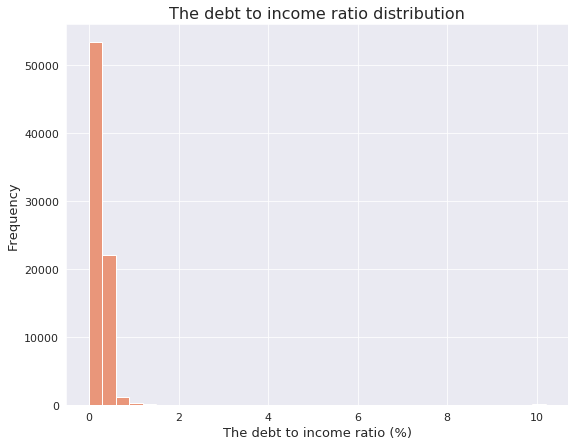

In [94]:
sns.set_style('darkgrid')
labels = {'title':'The debt to income ratio distribution','xlabel':'The debt to income ratio (%)','ylabel':'Frequency'}
make_histogram(df_subset.debt_to_income_ratio, bins, color = 'darksalmon', **labels);

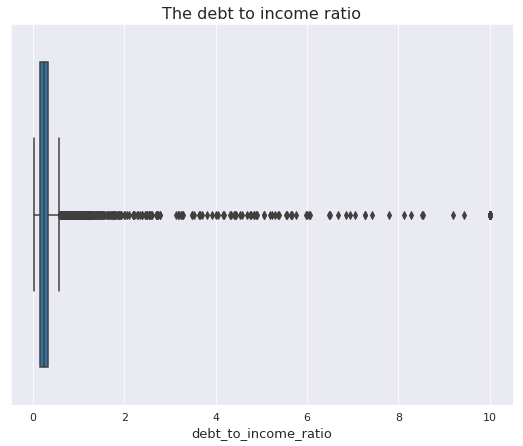

In [95]:
sns.boxplot(data = df_subset, x = 'debt_to_income_ratio')
plt.title('The debt to income ratio');

In [96]:
df_subset.debt_to_income_ratio.describe()

count    76793.000000
mean         0.260119
std          0.319549
min          0.010000
25%          0.150000
50%          0.230000
75%          0.320000
max         10.010000
Name: debt_to_income_ratio, dtype: float64

In order to approve your requested loan, this [debt-to-income-ratio](https://www.debt.org/credit/loans/personal/prosper-review-what-you-need-to-know-before-borrowing/) has to be lower than 50%. As we can see from the histogram and from the boxplot there are some outliers, even 100% ratio. The most borrowers have the ratio under 32%. And 3427 borrowers have the ratio over 50%.

In [97]:
df_subset.employment_duration.describe()

count    83929.000000
mean       102.951256
std         97.059572
min          0.000000
25%         30.000000
50%         74.000000
75%        147.000000
max        755.000000
Name: employment_duration, dtype: float64

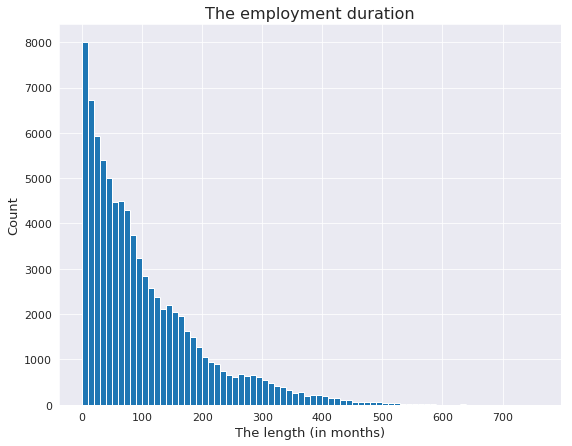

In [98]:
bins = np.arange(0, df_subset.employment_duration.max() + 10,10)
plot_labels = {'title':'The employment duration','xlabel':'The length (in months)','ylabel':'Count'}
make_histogram(df_subset.employment_duration, bins, **plot_labels);

The employment duration is the length of the borrower's occupation in months. We can see that the distribution is very right skewed. The average duration is approximately **8,5 years**. Half of the borrowers have the same employment status about approximately **6 years**. 

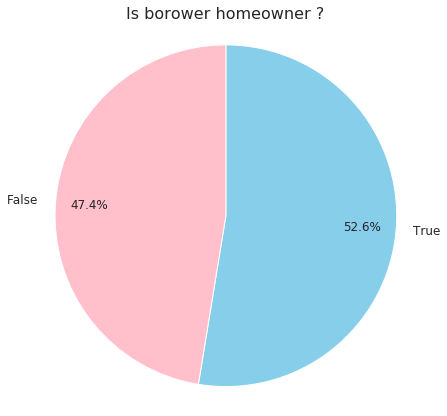

In [99]:
colors = ['skyblue', 'pink']
ax = df_subset['is_borrower_homeowner'].value_counts(normalize=True).mul(100).plot(kind = 'pie', autopct='%1.1f%%',startangle = 90, 
                                                                          counterclock = False, textprops={'fontsize': 12},
                                                                          pctdistance=0.8,
                                                                          colors = colors) 

plt.title('Is borower homeowner ?')
plt.ylabel('')
plt.axis('square');

In [100]:
df_subset.income_range

1         $50,000-74,999
3         $25,000-49,999
4              $100,000+
5              $100,000+
6         $25,000-49,999
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: income_range, Length: 83948, dtype: object

In [101]:
df_subset.income_range = df_subset.income_range.str.strip('$')

In [102]:
df_subset.income_range.value_counts()

50,000-74,999    25627
25,000-49,999    24175
75,000-99,999    14498
100,000+         14300
1-24,999          4654
Not employed       649
0                   45
Name: income_range, dtype: int64

In [103]:
range_ord = ['1-24,999','25,000-49,999','50,000-74,999','75,000-99,999','100,000+']

In [104]:
range_order = pd.api.types.CategoricalDtype(ordered = True, categories = range_ord)

In [105]:
df_subset.income_range = df_subset.income_range.astype(range_order)

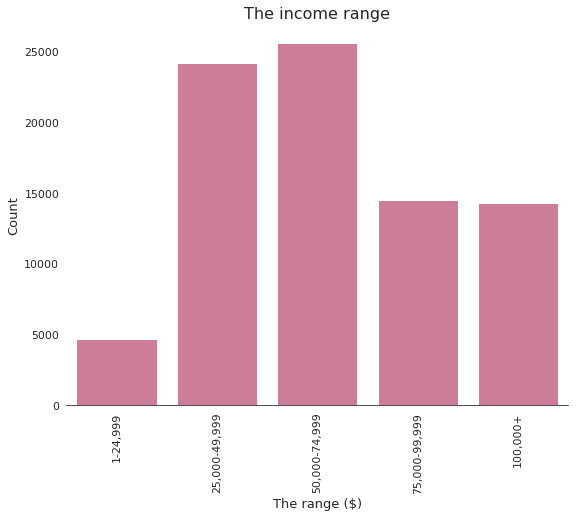

In [106]:
sns.set_style('white')
labels = {'title':'The income range','xlabel':'The range ($)','ylabel':'Count'}
make_countplot(df_subset.income_range,color = 'palevioletred', **labels)
sns.despine(left=True, bottom=False, right=True);

The most borrowers are in the income range 50.000-74.999$, followed by the income range 25.000-49.999.

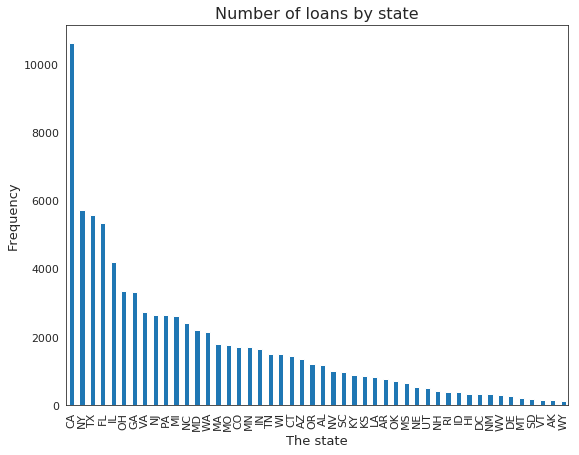

In [107]:
df_subset.state.value_counts().plot(kind='bar')
plt.title('Number of loans by state')
plt.xlabel('The state')
plt.ylabel('Frequency')
plt.xticks(rotation = 90);

In [108]:
df_subset.bank_card_utilization.describe()

count    83948.000000
mean         0.563459
std          0.301820
min          0.000000
25%          0.330000
50%          0.600000
75%          0.830000
max          2.500000
Name: bank_card_utilization, dtype: float64

In [109]:
bins_bank = np.arange(0, df_subset.bank_card_utilization.max()+0.08,0.08)

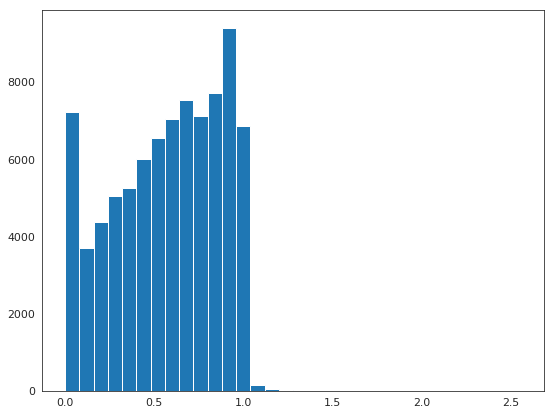

In [110]:
plt.hist(data=df_subset,x = 'bank_card_utilization',bins = bins_bank);

Bank card utilization tell us the percentage of available revolving credit that was utilized at the time the credit profile was pulled. In other words, it's how much you currently owe divided by your credit limit. We can see from the statistic that there is maximum value 2.5 (in other words 250%) that is erroneus value.

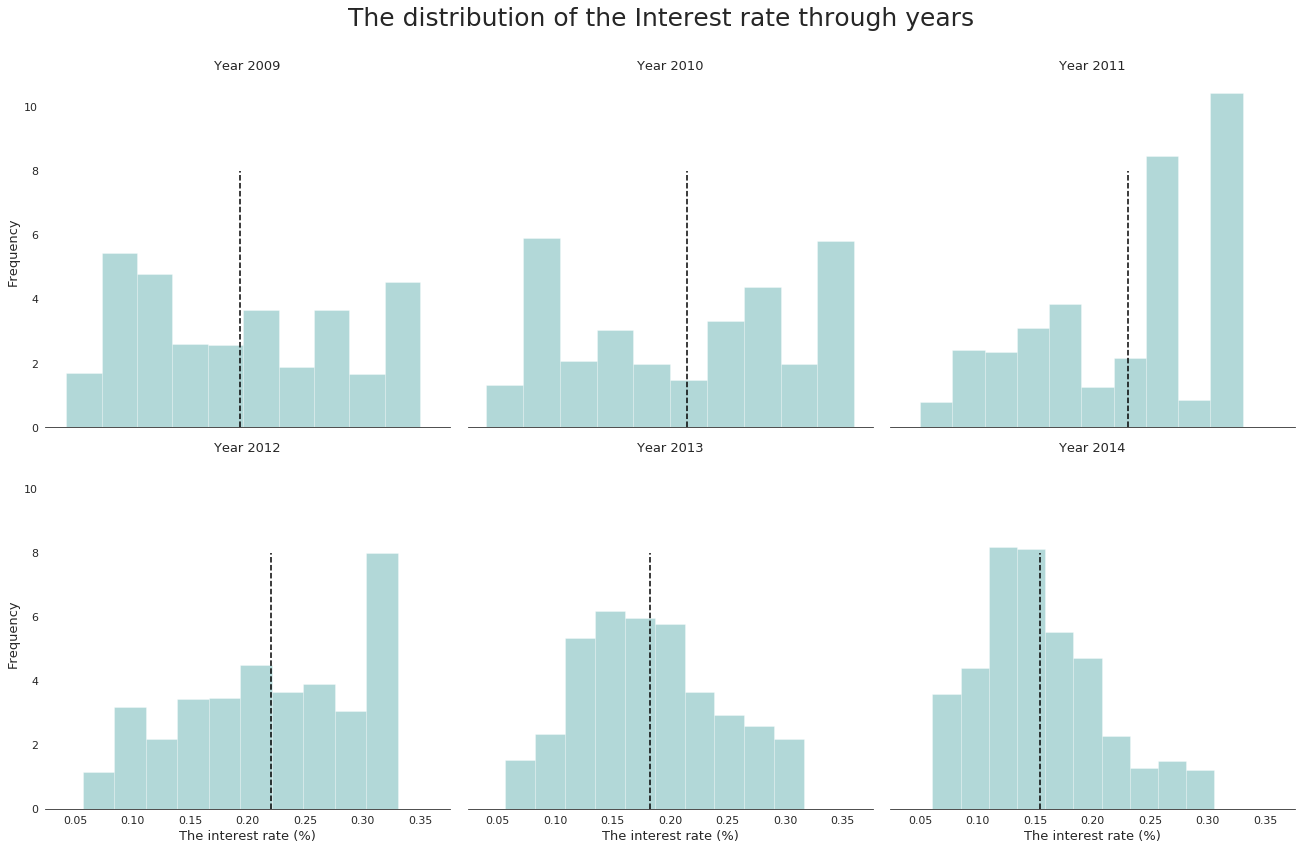

In [111]:
g = sns.FacetGrid(data = df_subset, col = 'year', col_wrap = 3, size = 6)
g.map(plt.hist,'interest_rate',normed = True,alpha = 0.3, color='teal')
g.set_titles("Year {col_name}")
sns.despine(left=True, bottom=False, right=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The distribution of the Interest rate through years',fontsize=25)
g.set_axis_labels(x_var='The interest rate (%)', y_var='Frequency')
for m,ax in zip(df_subset.groupby('year').interest_rate.mean(), g.axes.ravel()):
    ax.vlines(m,ymin=0,ymax=8, linestyle="dashed")   

The plot shows macroeconomic situation throughout the years. This is displayed in the shape of interest rate distribution. 2011 and 2012 were years of slight financial crisis. We can thus see sharp increase in interest rate offerd. In year 2011, the range of high rates was approximately from **25% to 30%**. In year 2012 the rates were from **30% to about 33**%. This is returning to normal from 2013 onwards. The black dashed line represents average interest rate throughout the years. As expected, the highest average interest rate about **23%** was in **year 2011**. The lowest average rates were **18% and 15%** in years **2013 and 2014, respectively**.

**Univariate exploration summary**

This distribution of the interest rate is unimodal and there is the peak as well. From the area slightly below **0,1** there is an increase of the frequency. There is a peak **between 0.1 and 0.2** and then decrease of the frequency. Interestingly, there is a steep jump of the frequency right at **0.3** rather than a smooth decrease of frequencies.
We looked closer at the distribution of the Interest rate and find out that there are the peak between 0.3 and 0.4.

After logarithmic transformation applied on the Original loan amount we found out that the distribution is unimodal with **the peak close to value 5000**. There are interesting changes in the frequency after value **5000**. The frequency does not fall down gradually, but there are three peaks and each peak is followed by decrease of frequency.

The variable monthly income contained a lot of outliers, therefore, we kept only those records which are in 99th percentile. After this adjustment the distribution of monthly income was unimodal and right skewed with one peak a little **below 5000$**.

The most borrowers have the loans with term of **36 months**.

The highest number of loans is in the category Other. Second most common occupation category is Professional. Because these two categories don't provide enough information for us, we filtered out them and find out out that the most common occupations are **Computer Programmers, Executives, Teachers, Analysts and Administrative Assistants**.

There are several categories regarding the loan status. The highest count belongs to **current loans**, following by loans that are completed. We separated categories regarding past due. The highest count has the first category Past Due (1-15 days).

There are approximately **92.5%** borrowers who have the required documentation to support their income.

**The average Prosper score is 6** and the most borrowers have assigned the score in the **range 4-8**. The most common score is 4 with 12595 loans, followed with score 6 with 12278 loans.

The most loans have assigned the rating **C** (5649 lonas) with estimated average annual loss rate 6-8.99%, followed by the rating **D** (5153 loans).

The employment duration is the length in months of the employment status. **The average employment duration** is approximately **8,5 years**. Half of the borrowers have the same employment status about approximately **6 years**.

The most borrowers are in the income range **50.000-74.999$**, followed by the income range **25.000-49.999**.

Bank card utilization tell us the percentage of available revolving credit that was utilized at the time the credit profile was pulled. In other words, it's how much you currently owe divided by your credit limit. We can saw from the statistic that there is maximum value 2.5 (in other words 250%) that is erroneus value. In the exploration in the bivariate section we'll filter out values like this.

### Bivariate Exploration 

How much the interest rate and the APR differ? 

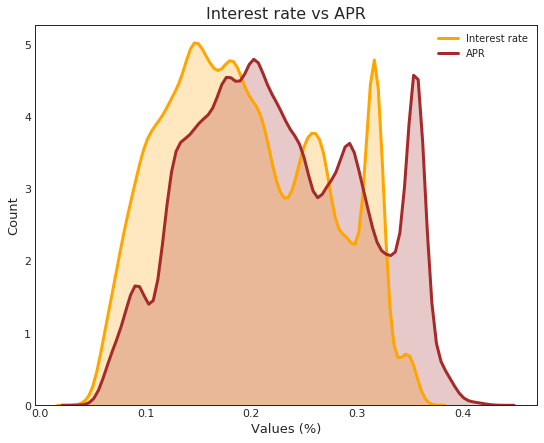

In [158]:
# Compare the APR and interest rate distribution
bins_rate = np.arange(0, df_subset.interest_rate.max() + 0.02, 0.02)
bins_apr = np.arange(0, df_subset.APR.max() + 0.02, 0.02)

sns.distplot(df_subset['interest_rate'], bins = bins_rate, hist = False, kde = True, label = 'Interest rate', color = 'orange', 
             kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df_subset['APR'], bins = bins_apr, hist = False, kde = True, label = 'APR', color = 'brown',
             kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Interest rate vs APR')
plt.ylabel('Count')
plt.xlabel('Values (%)');

**Interest rate and The annual percentage rate**

- It is the cost of borrowing the principal. The annual percentage rate should be always higher than the interest rate, including other costs associated with borrowing the money (the exception is a specialized deal where a lender is offering a rebate on a portion of borrower's interest expense). 

As we can see from the graph above, **the APR is higher as our Interest rate**. Both variables varies from **a little below 0.1 to 0.4**.

Are there any interesting relationships among the variables? 

In [113]:
corr = df_subset.corr()

In [114]:
corr

,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,prosper_score,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year
APR,1.000000,0.993344,-0.039350,-0.133650,0.247949,0.127605,-0.667659,-0.119091,-0.239119,-0.424876,-0.319113,0.794286,0.949669,-0.238463
interest_rate,0.993344,1.000000,-0.039310,-0.124786,0.239794,0.125194,-0.649167,-0.113783,-0.235882,-0.411669,-0.328704,0.817632,0.945450,-0.259311
employment_duration,-0.039350,-0.039310,1.000000,0.156022,0.087553,0.011597,-0.006206,0.042293,0.117673,0.078653,0.063170,-0.036439,-0.039393,0.088173
is_borrower_homeowner,-0.133650,-0.124786,0.156022,1.000000,0.098194,-0.010989,0.062800,0.091857,0.265751,0.174492,0.139300,-0.085318,-0.125701,0.009200
bank_card_utilization,0.247949,0.239794,0.087553,0.098194,1.000000,0.058578,-0.246547,0.051605,0.084753,-0.028994,-0.008557,0.160773,0.234883,0.108277
debt_to_income_ratio,0.127605,0.125194,0.011597,-0.010989,0.058578,1.000000,-0.143805,-0.022286,-0.193959,-0.013090,0.006511,0.086480,0.124737,0.025023
prosper_score,-0.667659,-0.649167,-0.006206,0.062800,-0.246547,-0.143805,1.000000,0.151430,0.203885,0.262547,0.171041,-0.382537,-0.673191,-0.174272
income_verifiable,-0.119091,-0.113783,0.042293,0.091857,0.051605,-0.022286,0.151430,1.000000,0.093183,0.095942,0.066471,-0.084202,-0.118435,0.063923
monthly_income,-0.239119,-0.235882,0.117673,0.265751,0.084753,-0.193959,0.203885,0.093183,1.000000,0.413878,0.400435,-0.186143,-0.228381,0.101209
loan_orig_amount,-0.424876,-0.411669,0.078653,0.174492,-0.028994,-0.013090,0.262547,0.095942,0.413878,1.000000,0.916591,-0.284051,-0.428643,0.343143


The great way to gain insight into the relationships of our data is computing and visualizating their correlation coefficients using `sns.heatmap`. As we can see, we have negative and also positive relationships among the variables. For better readability we need to set diverging colormap, such that positive and negative values will be represented by different colors of the colormap.

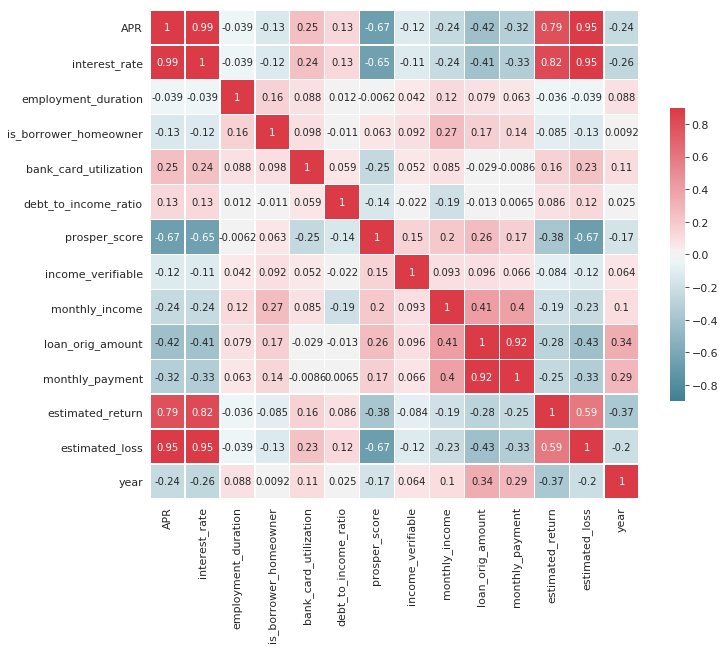

In [115]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap object 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and customize some arguments 
ax = sns.heatmap(corr, cmap=cmap, annot = True, fmt = '.2g',vmin = -.9, vmax=0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Warm colors (red) indicate a positive correlation, cool colors (blue) indicate a negative correlation. The correlation coefficient (r) takes values between +1 and -1. When r = 0, there is no linear relationship between x and y.

Generally, correlation coefficient values around 0.6 and higher (or -0.6 and lower) is a sign of a potentially exciting linear relationship between two variables.

As we can see from the heatmap, the strongest positive correlated pair (except the main diagonal and strong positive relationship between the Interest rate and APR) is: **Interest rate and Estimated return with r = 0.82**. The second pair is **Interest rate and Estimated loss with r = 0.95**. The strongest negative relationship have **Interest rate and Prosper score with r= -0.65**. The relationship between Interest rate and Prosper rating will be investigated later in this section. The variable original loan amount and the interest rate (**r= -0.41**) have also negative, but this relationship is weaker. We expected the Debt to income ratio will have an impact on the interest rate, but as we can see, the correlation coefficient is only 0.13, so this relationship is very weak. Also the relationship betweeen the interest rate and monthly income is weak, r = -0.24. 
We didn't find other interesting relationships among the variables displayed in the heatmap.

In [116]:
# Function for creating scatter plot
def make_scatter(x, y, ax=None, **kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    plt.scatter(x,y,**kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

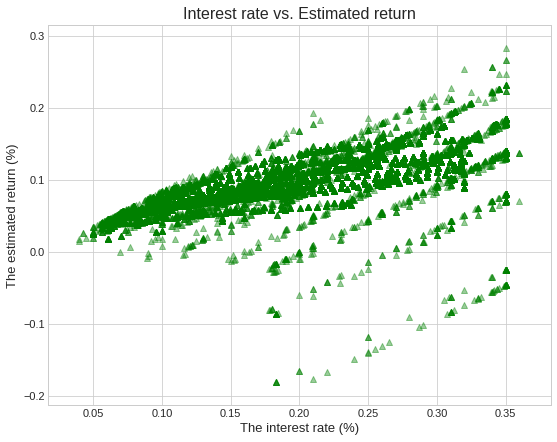

In [117]:
# Visualize the relationship between the interest rate and the estimated return
plt.style.use('seaborn-whitegrid')
labels = {'title': 'Interest rate vs. Estimated return', 'xlabel':'The interest rate (%)', 'ylabel': 'The estimated return (%)'}
make_scatter(df_subset.interest_rate, df_subset.estimated_return, alpha = 0.4,color = 'g',marker = '^',**labels);

**Estimated return** is the difference between the Estimated Effective Yield and the Estimated Loss Rate. The relationship between these two variables is positive with correlation coefficient **0.82**. With the interest rate to approximately **15%** there is estimated return for lenders from about **0% to slightly above 10%**. Between approximately **17% to 35%** of interest rate there are some cases when the **estimated returns are in negative values**.

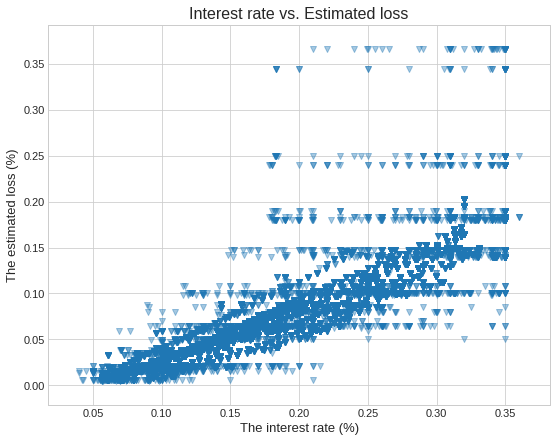

In [118]:
# Visualize the relationship between the interest rate and the estimated loss
plt.style.use('seaborn-whitegrid')
labels = {'title': 'Interest rate vs. Estimated loss', 'xlabel':'The interest rate (%)', 'ylabel': 'The estimated loss (%)'}
make_scatter(df_subset.interest_rate, df_subset.estimated_loss, alpha = 0.4,marker = 'v',**labels);

**Estimated loss** is the estimated principal loss on charge-offs. The loss estimates are based on the historical performance of Prosper loans to borrowers with similar characteristics. They are not a guarantee and actual performance may differ from expected performance. This scatterplot shows the strong positive relationship between the estimated loss and the interest rate with correlation coefficient **0.95**. **With the higher interest rate, there is higher percentage of the estimated loss for the lenders**. 

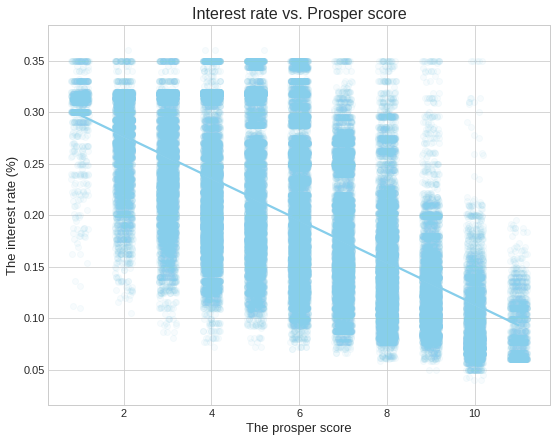

In [119]:
# Visualize the relationship between the interest rate and prosper score using .regplot 
sns.regplot(data = df_subset, x = 'prosper_score', y = 'interest_rate',x_jitter = .2, 
            scatter_kws = {'alpha':1/15},color = 'skyblue')
plt.title('Interest rate vs. Prosper score')
plt.xlabel('The prosper score')
plt.ylabel('The interest rate (%)');

Using `sns.regplot` we can visualize a linear relationship as determined through regression. This function draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression. Since the Prosper score is a discrete variable the relationship is shown in this way. The plot is created with too many overlapping data points. We've tried to add some jitter that create a small amounts of random noise to the position of each point so that multiple data points, that have the same values are spread over a small area. However this approach didn't help us. Instead we'll try to plot the data using `sns.boxplot` and `sns.violinplot`.

Does the Prosper score affect the Interest rate of the borrowers?

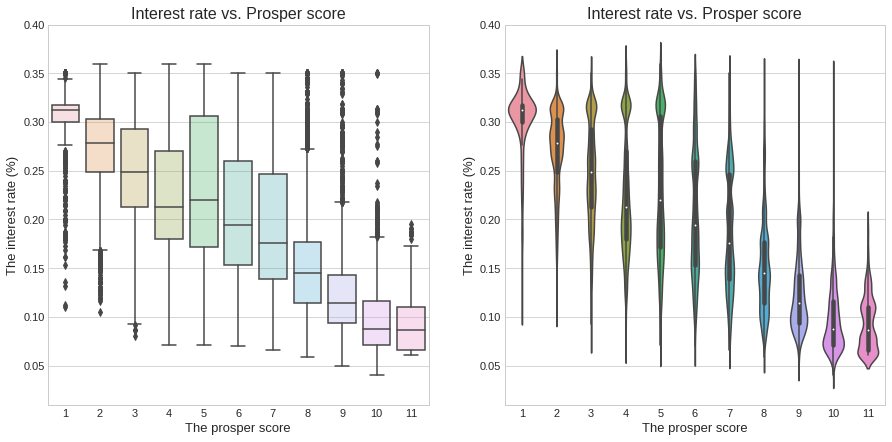

In [120]:
# Create boxplot and violinplot
fig, axes = plt.subplots(figsize=(15, 7))
ax1 = plt.subplot(1,2,1)
ax = sns.boxplot(data = df_subset,x ='prosper_score', y = 'interest_rate', color = None)
plt.title('Interest rate vs. Prosper score')
plt.xlabel('The prosper score')
plt.ylabel('The interest rate (%)')
ax1 = plt.subplot(1,2,2, sharey = ax1)
sns.violinplot(data = df_subset,x ='prosper_score', y = 'interest_rate')
plt.title('Interest rate vs. Prosper score')
plt.xlabel('The prosper score')
plt.ylabel('The interest rate (%)');
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

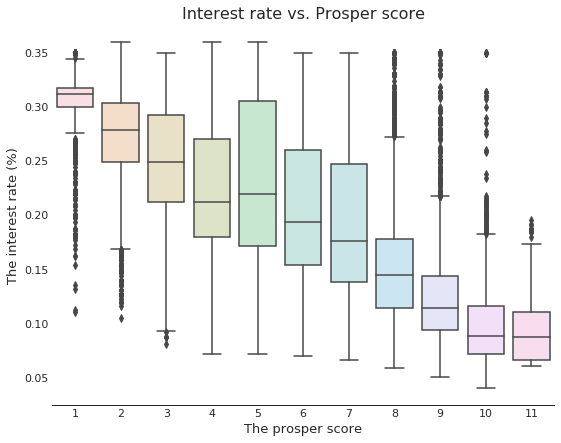

In [121]:
sns.set_style('white')
ax = sns.boxplot(data = df_subset,x ='prosper_score', y = 'interest_rate', color = None)
plt.title('Interest rate vs. Prosper score')
plt.xlabel('The prosper score')
plt.ylabel('The interest rate (%)')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.despine(left=True, bottom=False, right=True);

The Prosper score ranges from 1 to 11. The score 11 is considered as the best, or lowest risk, score.
According to our graph, we can say that there is not monotonic relationship between The interest rate and The prosper score. Indeed, **the main trend is the higher Prosper score, the lower Interest rate, thus a more advantegeous for the borrower**. The correlation coefficient is **-0.65**. Looking at the boxplot we can see there are also some outliers. Especially in case of the low Prosper scores 1, 2 and 3 and the hight Prosper scores 8,9,10 and 11. 

[The Prosper score](https://www.prosper.com/plp/general-prosper_score/) estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination. The Prosper score was built using historical Prosper data and variables such as income, debt-to-income ratio, total revolving balance and delinquencies were reviewed. 

In [122]:
def create_boxplot(x, y, ax=None, **kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    sns.boxplot(x,y,**kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

Does the Prosper score affect the Interest rate of the borrowers?

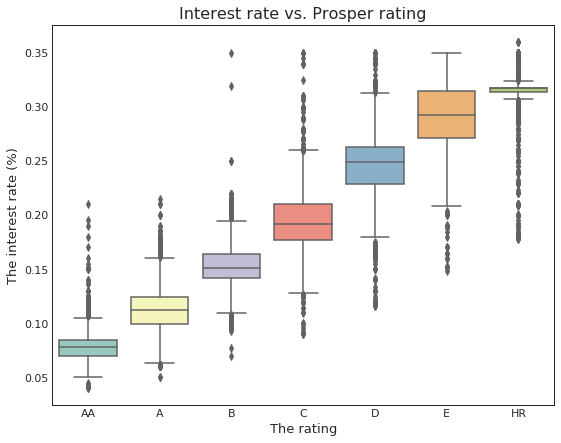

In [164]:
labels = {'title':'Interest rate vs. Prosper rating','xlabel':'The rating','ylabel':'The interest rate (%)'}
create_boxplot(df_subset.prosper_rating, df_subset.interest_rate, palette = 'Set3', **labels);

**Prosper Ratings** allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor. (AA being the best score (the lowest risk), HR being the worst score (the highest risk)). From the boxplot we can see that the loans who have assigned the best rating have the lowest interest rate, **under 10%**. The rating C exceed 20% interest rate. The loans with HR rating have the highest interest rate, **above 30%**.

Does the original loan amount have an impact on the Interest rate of the borrowers?

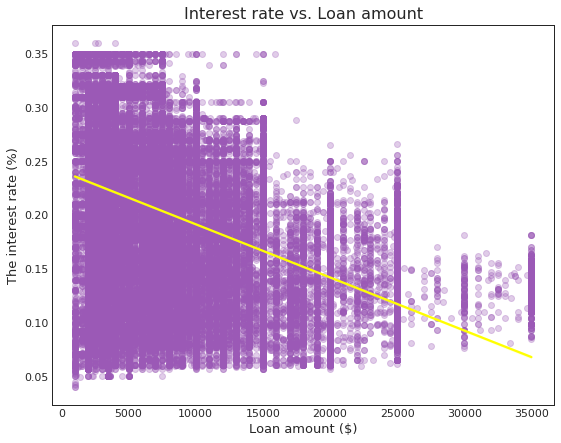

In [124]:
#Create the regplot
sns.regplot(data = df_subset, x = 'loan_orig_amount', y = 'interest_rate',x_jitter = .5, 
            truncate = True, scatter_kws = {'color': '#9b59b6', 'alpha': 0.3}, line_kws = {'color': 'yellow'}, ci = 95)
plt.title('Interest rate vs. Loan amount')
plt.xlabel('Loan amount ($)')
plt.ylabel('The interest rate (%)');

The lowest loan is 1000, the highest is of value 35000. The average loan amount is approximatelly 9000. The half of the loans is under the value 7500$.  From the regplot we can see the negative relationship between loan amount and the interest rate with the correlation coefficient **-0.41**. From the value about 10.000, we can see that **an increase in the loan amount is associated with a decrease in the interest rate**.

In [125]:
df_subset.groupby('income_range').interest_rate.mean()

income_range
1-24,999         0.237531
25,000-49,999    0.213708
50,000-74,999    0.192606
75,000-99,999    0.183135
100,000+         0.170445
Name: interest_rate, dtype: float64

What is the interest rate by the term? 

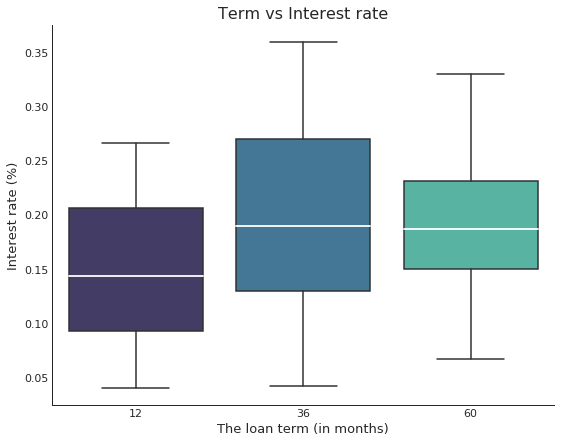

In [126]:
medianprops = dict(color="white",linewidth=1.8)
labels = {'title':'Term vs Interest rate','xlabel':'The loan term (in months)','ylabel':'Interest rate (%)'}
create_boxplot(df_subset.term, df_subset.interest_rate, medianprops=medianprops, palette = 'mako',**labels)
sns.despine(top=True, right=True, left=False, bottom=False);

The interest rates might differ in case of different loan terms. The 60 months loans have the smallest range of the Interest rates. The 36 and 60 terms loans have a very similar median of value about 18%. For the 12 months loans, the interest rates varies from approximatelly 10% to slightly above 20%.

How the interest rates differ in case of the income ranges?

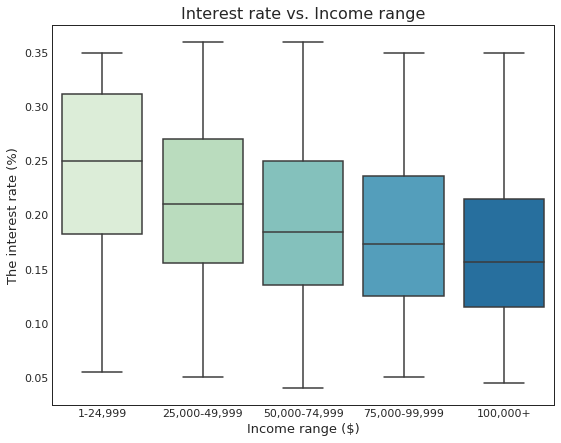

In [127]:
# Display the relationship between income ranges and the interest rate
labels = {'title':'Interest rate vs. Income range','xlabel':'Income range ($)','ylabel':'The interest rate (%)'}
create_boxplot(df_subset.income_range, df_subset.interest_rate, palette = 'GnBu',**labels);

The highest interest rate is for the income range **1-24.999$** and the average interest rate is about 24%. The borrowers who are in the last income range (100.000+) have the best interest rates and interest rate about **17%** in average. 
So the main trend is that the higher income range, the lower interest rate.

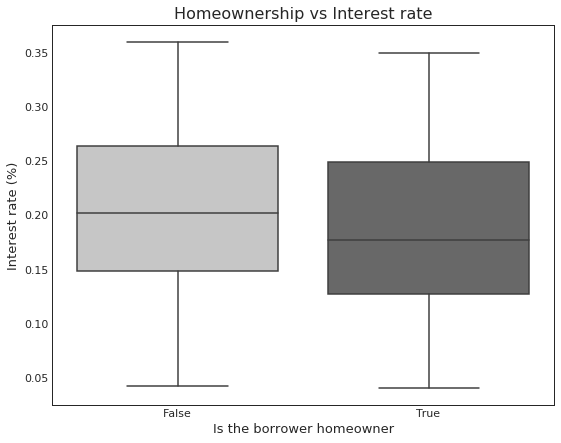

In [128]:
labels = {'title':'Homeownership vs Interest rate','xlabel':'Is the borrower homeowner','ylabel':'Interest rate (%)'}
create_boxplot(df_subset.is_borrower_homeowner, df_subset.interest_rate, palette = 'Greys',**labels);

Some lenders claim homeownership is a sign of a more stable and responsible borrowers. On the other hand, there are also the lenders who claim ownership is a sign of the borrowers who will likely default on their Prosper loan when mortage interest rates increase. From the graph above it looks like the borrowers who are homeowners have a slightly better Interest rate for the requested loans in the Prosper. 

In [129]:
card_utilization = df_subset.loc[df_subset['bank_card_utilization'] < 1]

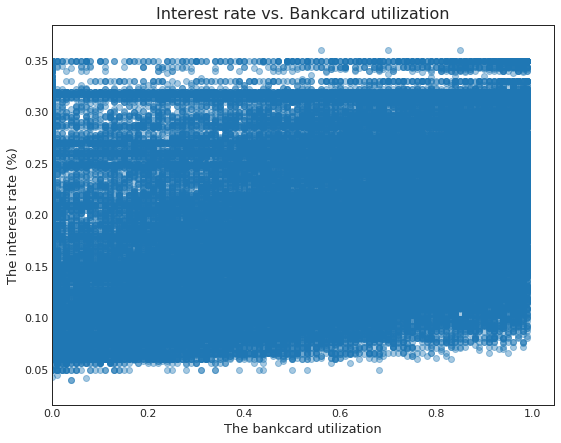

In [130]:
# Display the relationship between the interest rate and bankcard utilization
labels = {'title': 'Interest rate vs. Bankcard utilization', 'xlabel':'The bankcard utilization', 'ylabel': 'The interest rate (%)'}
make_scatter(card_utilization.bank_card_utilization, card_utilization.interest_rate, alpha = 0.4,**labels)
plt.xlim(0);

Since there are too many data point, visualizing these two variables using scatter plot have caused overplotting and our graphic have become unreadable.

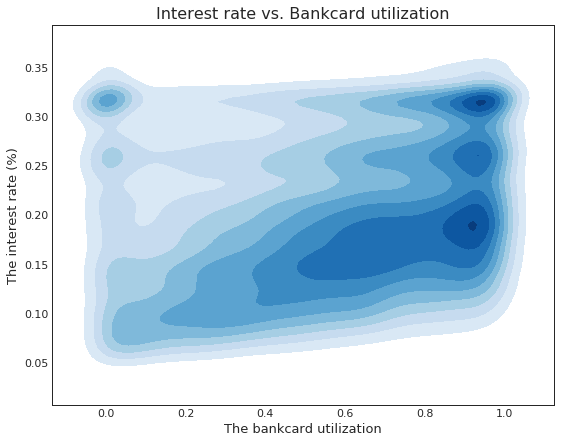

In [131]:
# Create 2D density plot of interest rate and bankcard utilziation
sns.kdeplot(card_utilization.bank_card_utilization, card_utilization.interest_rate,cmap="Blues", shade=True, shade_lowest=False)
plt.title('Interest rate vs. Bankcard utilization')
plt.xlabel('The bankcard utilization')
plt.ylabel('The interest rate (%)');

The most data points are located from utilization of 0.6 with 15% interest rate and between 0.8 and 1 (80 and 100%). Here, the interest rate varies more, from 15 to above 30%.

In [132]:
card_utilization[['bank_card_utilization','interest_rate']].describe()

,bank_card_utilization,interest_rate
count,82853.000000,82853.000000
mean,0.557256,0.195418
std,0.298694,0.074388
min,0.000000,0.040000
25%,0.320000,0.135500
50%,0.590000,0.187400
75%,0.820000,0.256600
max,0.990000,0.360000


In [133]:
# Set up the bins
bins_x = np.arange(0, card_utilization.bank_card_utilization.max()+ 0.1,0.1)
bins_y = np.arange(0, card_utilization.interest_rate.max()+0.05,0.05)

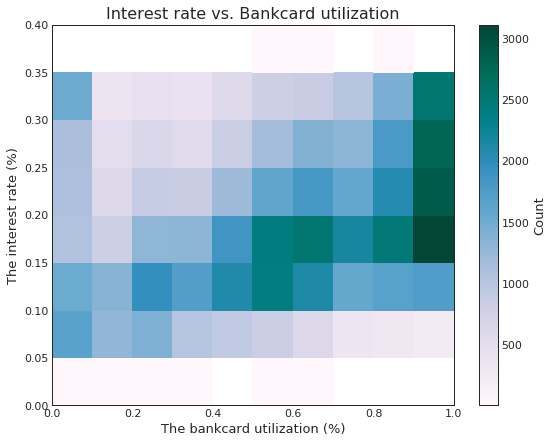

In [134]:
# Create 2D histogram plot
h2d = plt.hist2d(card_utilization.bank_card_utilization, card_utilization.interest_rate, cmap='PuBuGn', bins = [bins_x,bins_y],cmin = 0.5)
plt.colorbar(label='Count')
plt.title('Interest rate vs. Bankcard utilization')
plt.xlabel('The bankcard utilization (%)')
plt.ylabel('The interest rate (%)');

The best way for visualizing these two variables is 2D histogram plot. The relationship between interest rate and bankcard utilization is very weak (**r=0.24**). The best bankcard utilization is 0%, which means you're not using any of your available credit. Generally, a good [bankcard utilization](https://www.thebalance.com/what-is-a-good-credit-utilization-ratio-960548) should be less than 30%. Here, we can see that most values are located in the area between **50-100%** bankcard utilization with the interest rate in range **10% - 35%**.

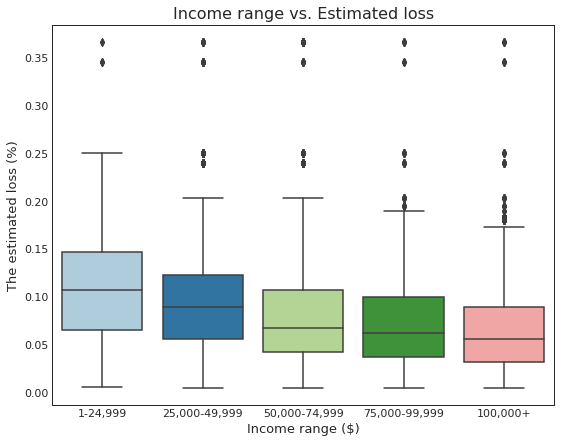

In [162]:
# Display the relationship between income ranges and the estimated loss
labels = {'title':'Income range vs. Estimated loss','xlabel':'Income range ($)','ylabel':'The estimated loss (%)'}
create_boxplot(df_subset.income_range, df_subset.estimated_loss, palette = 'Paired',**labels);

For the first income range **1-24.999**$ there is the largest variability in the estimated loss. 

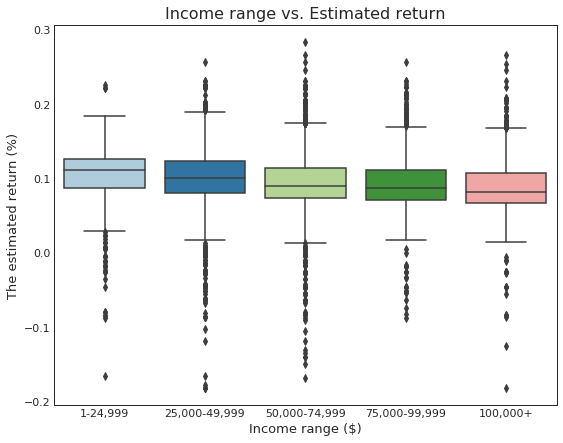

In [163]:
# Display the relationship between income ranges and the estimated return
labels = {'title':'Income range vs. Estimated return','xlabel':'Income range ($)','ylabel':'The estimated return (%)'}
create_boxplot(df_subset.income_range, df_subset.estimated_return, palette = 'Paired',**labels);

In [137]:
df_subset.estimated_return.min()

-0.1816

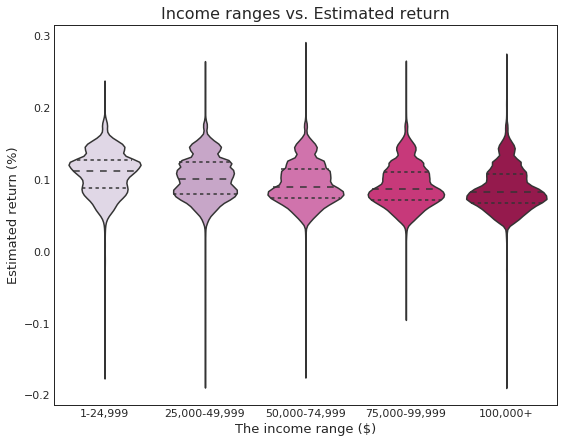

In [166]:
# Display the relationship between income ranges and the estimated return
sns.violinplot(df_subset.income_range, df_subset.estimated_return, palette = 'PuRd', inner = 'quartile')
plt.title('Income ranges vs. Estimated return')
plt.xlabel('The income range ($)')
plt.ylabel('Estimated return (%)');

There are very small differences among the income ranges in case of the estimated return. We can see negative values within estimated returns. These are most likely caused by extremely risky loans which turned out to have negative expected value outcomes.

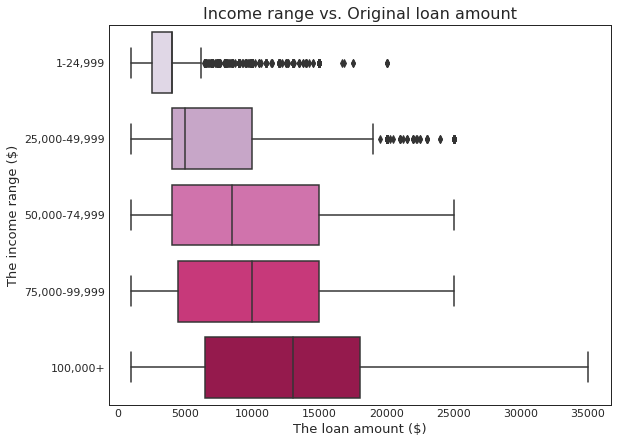

In [139]:
# Display the relationship between income ranges and the original loan amount
labels = {'title':'Income range vs. Original loan amount','xlabel':'The loan amount ($)','ylabel':'The income range ($)'}
create_boxplot(df_subset.loan_orig_amount, df_subset.income_range, palette = 'PuRd',**labels);

Here, we can clearly see the difference between income ranges and the loan amounts that can be approved acording to the borrower's income. There is the minimum loan amount of 1000 and the maximum loan amount is 35000. The borrowers who belong into the middle category (50.000-74.999) have borrowed **9060$** in average.

**Bivariate exploration summary**

I expected The debt-to-income ratio, the Prosper score, the Prosper rating, stated monthly income, the loan original amount and term could have an impact on the interest rate. Interestingly, The estimated return and Estimated Loss had strong positive relationship with the Interest rate, with the correlation coefficients 0.82 and 0.95, respectively. The strong negative relationship is betwee the interand Prosper score (r = -0.65). The main trend is the higher Prosper score, the lower Interest rate, thus a more advantegeous for the borrower. The original loan amount had negative relationship with interest rate, the correlation coefficient was -0.41 and generally we can say that an increase in the loan amount is associated with a decrease in the interest rate. The relationships between rate and Debt to income ratio and monthly income were weak.
We observed aso the relationship between the interest rate and Prosper rating. Those loans that have assigned the best rating have the lowest interest rate, under 10%. On the other hand the loans with the worst HR rating have the highest interest rate, above 30%. We can also saw that the income range is associated with the interest rate, with increasing income range, there is decrease of the interest rate and the increase of the original loan amount. 

### Multivariate Exploration 

In [140]:
def create_boxplot_hue(x, y, hue, ax=None, **kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    sns.boxplot(x,y,hue, **kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

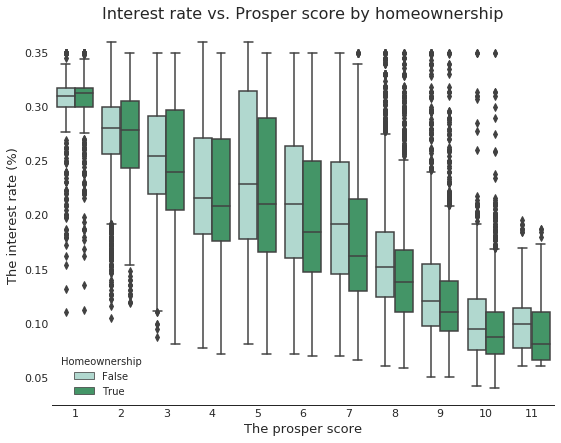

In [141]:
sns.set_style('white')
labels = {'title':'Interest rate vs. Prosper score by homeownership','xlabel':'The prosper score','ylabel':'The interest rate (%)'}
create_boxplot_hue(df_subset.prosper_score, df_subset.interest_rate, hue=df_subset.is_borrower_homeowner ,palette = 'BuGn',**labels)
plt.legend(ncol = 1, framealpha = 1,title = 'Homeownership')
sns.despine(top=True, right=True, left=True, bottom=False);

In case of Prosper score **1 and 4**, the homeownership doesn't cause a difference in the interest rates. The borrowers with the Prosper score **from 5 to 11** can get a better interest rate, when they have provided proof of homeownership (or with mortage debt on their credit reports) to Prosper. The borrowers with the score **2 and 3**: for the borrowers who don't own a house there are smaller range of interest rates. 

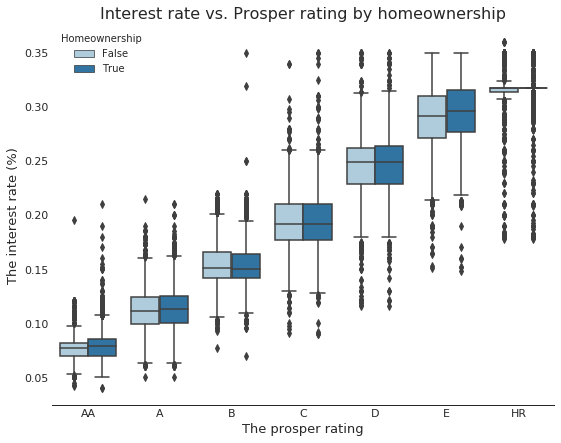

In [142]:
labels = {'title':'Interest rate vs. Prosper rating by homeownership','xlabel':'The prosper rating','ylabel':'The interest rate (%)'}
create_boxplot_hue(df_subset.prosper_rating, df_subset.interest_rate, hue=df_subset.is_borrower_homeowner ,palette = 'Paired',**labels)
plt.legend(ncol = 1, framealpha = 1,title = 'Homeownership')
sns.despine(top=True, right=True, left=True, bottom=False);

Acording to Prosper rating that is assigned to every loan application, homeownership doesn't affect the interest rate too much. What we can see, is that **interquartile range is increasing** with worsening Prosper rating, this means that differences between Interest rates within one Prosper rating are growing as the Prosper rating gets worse.

In [143]:
loan_amount_under_10k = df_subset.query("loan_orig_amount < 10000")

In [144]:
loan_amount_above_10k = df_subset.query("loan_orig_amount > 10000")

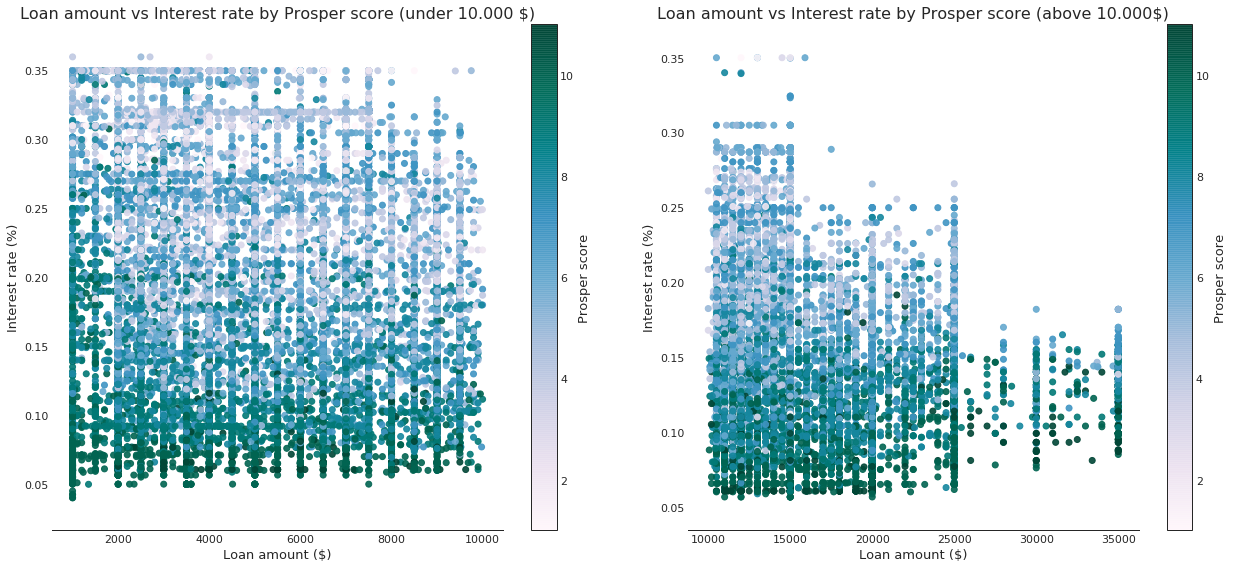

In [145]:
sns.set_style('white')
fig, axes = plt.subplots(1,2, figsize = (18,8))
axes = axes.flatten()
plt.subplot(1,2,1)
plt.scatter(data = loan_amount_under_10k, x = 'loan_orig_amount', y = 'interest_rate', c = 'prosper_score',
            marker = 'o',alpha = 0.9, cmap = 'PuBuGn')
plt.colorbar(label = 'Prosper score')
plt.title('Loan amount vs Interest rate by Prosper score (under 10.000 $)')
plt.xlabel('Loan amount ($)')
plt.ylabel('Interest rate (%)')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.subplot(1,2,2)
plt.scatter(data = loan_amount_above_10k, x = 'loan_orig_amount', y = 'interest_rate', c = 'prosper_score',
            marker = 'o',alpha = 0.9, cmap = 'PuBuGn')
plt.colorbar(label = 'Prosper score')
plt.title('Loan amount vs Interest rate by Prosper score (above 10.000$)')
plt.xlabel('Loan amount ($)')
plt.ylabel('Interest rate (%)')
sns.despine(top=True, right=True, left=True, bottom=False)
fig.tight_layout();

In the first graph are displayed loans with amount under 10.000$. We can see that the majority of the loans in this group have higher interest rate and have assigned worse Prosper score (light dots). In the second graph are displayed loans above 10.000, these have better Prosper score (darker dots) and better interest rates.

Does the term have an impact on the loan amount?

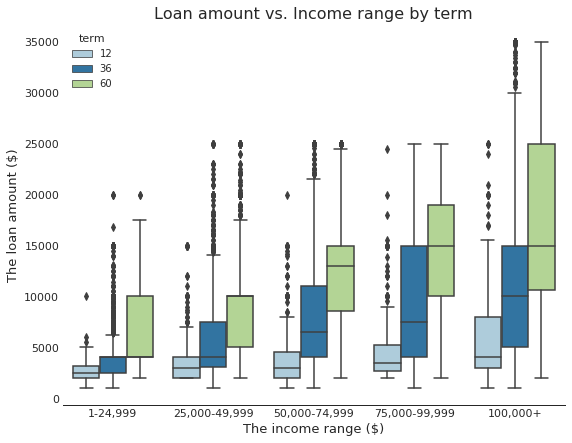

In [153]:
labels = {'title':'Loan amount vs. Income range by term','xlabel':'The income range ($)','ylabel':'The loan amount ($)'}
create_boxplot_hue(df_subset.income_range, df_subset.loan_orig_amount, hue=df_subset.term ,palette = 'Paired',**labels)
sns.despine(top=True, right=True, left=True, bottom=False);

Major pattern can be observed in generally rising loan original amounts with rising income range. Median loan original amount is rather similar across all income ranges for **12 months term loans**. There is sharp increase in median loan original amount from group **2** (25.000-49.999) to group **3** (50.000-74.999) for 60 months term loans. The loan original amount median is them rather similar throughout groups **3** (50.000-74.999) to **5** (100.000+). 

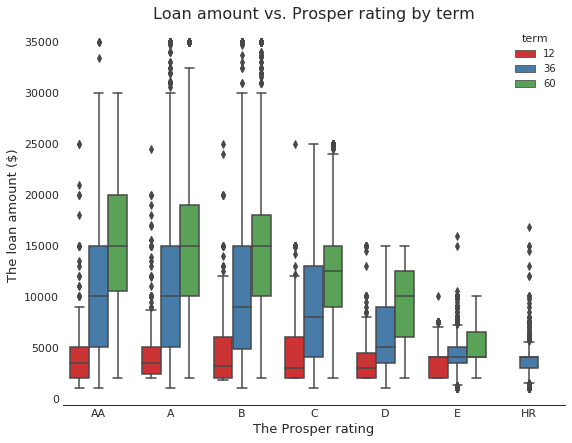

In [152]:
labels = {'title':'Loan amount vs. Prosper rating by term','xlabel':'The Prosper rating','ylabel':'The loan amount ($)'}
create_boxplot_hue(df_subset.prosper_rating, df_subset.loan_orig_amount, hue=df_subset.term ,palette = 'Set1',**labels)
sns.despine(top=True, right=True, left=True, bottom=False);

Major pattern shows generally decreasing loan original amount with worsening Prosper rating. This is true for all three different terms of loans. Interestingly, Prosper rating groups **AA, A, B** have very similar loan original amount distributions accross all three different term of loans. **12** months term loans have very similar loan original amount median in groups **AA,A,B,C and D**.

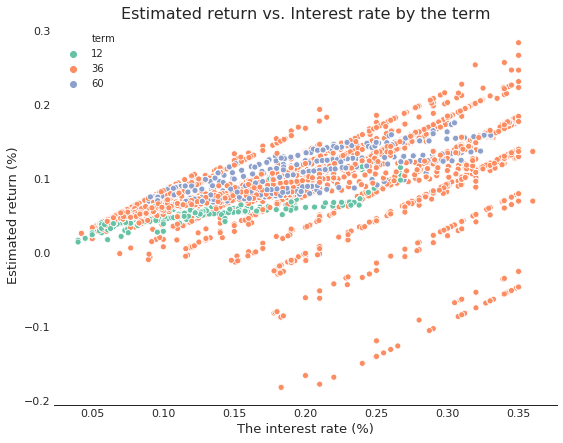

In [148]:
ax = sns.scatterplot(data=df_subset,x='interest_rate',y='estimated_return',hue='term', palette='Set2')
plt.title('Estimated return vs. Interest rate by the term')
plt.xlabel('The interest rate (%)')
plt.ylabel('Estimated return (%)')
sns.despine(top=True, right=True, left=True, bottom=False);

From the graph, we can see that the estimated return for the lenders is estimated to be positive in case of the 12, 36 and 60 months term loans. The major trend is observed in generally rising of the Estimated return with rising Interest rate. On the other hand, there are some cases when the 36 months term show estimated return in negative values. 36 months term loans are the most common in the Prosper.  

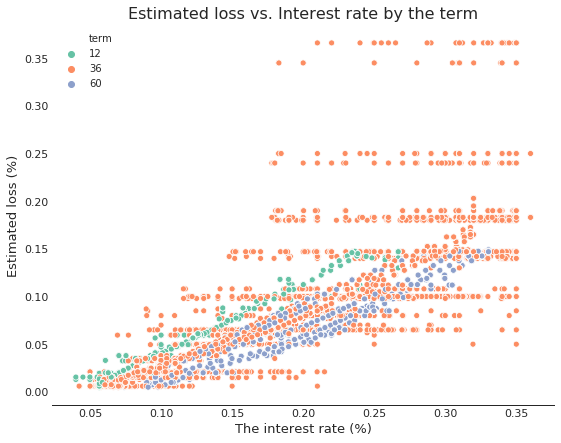

In [160]:
ax = sns.scatterplot(data=df_subset,x='interest_rate',y='estimated_loss',hue='term', palette='Set2')
plt.title('Estimated loss vs. Interest rate by the term')
plt.xlabel('The interest rate (%)')
plt.ylabel('Estimated loss (%)')
sns.despine(top=True, right=True, left=True, bottom=False);

**Multivariate exploration summary**
We investigated whether the homeownership causes some difference in the interest rate by the Prosper score of the borrowers. We found out that in case of Prosper score 1 and 4 it doesn't matter whether the borrower is homeowner. On the ther hand, borrowers with the score from 5 to 11 can get a better interest rate, if they have provided a proof of the homeownership. The borrowers with the score 2 and 3: for the borrowers who don't own a house there are smaller range of interest rates.
We displayed the original loan amount with the Prosper score and find out that the majority of the loans to 10.000$ have worse Prsper score. In case of the loans above 10.000, the amount of the loans with better score incerased.
Next we investigated income ranges with loan amount, separated by the terms. We observed the major pattern in generally rising loan original amounts with rising income range. And interestingly, median loan original amount is rather similar across all income ranges for 12 months term loans. In case of the Prosper rating, we observed that the 12 months term loans have very similar loan original amount median in groups AA,A,B,C and D.